In [278]:
from random import sample
from random import random
from random import choice
from copy import deepcopy
from math import log
#import numpy as np
import collections
import itertools
import numpy as np





In [279]:
class FitnessLandscape:
	def __init__(self, landscapeValues):
		self.landscape = landscapeValues
	
	#Converts a genotype to an integer by taking the binary value of the genotype
	def __convertGenotypeToInt(self, genotype):
		out = 0
		for bit in genotype:
			out = (out << 1) | bit
		return out
	
	def getFitness(self, genotype):
		fitness = self.landscape[self.__convertGenotypeToInt(genotype)]
		return fitness

	def genotypeLength(self):
		return int(log(len(self.landscape), 2))

In [3]:
#==============================================================================#
#============================== Helper Functions ==============================#


# Computes the hamming distance between two genotypes.
def hammingDistance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))

# Takes a genotype and converts it to an integer for use indexing the fitness landscape list 
def convertGenotypeToInt(genotype):
	out = 0
	for bit in genotype:
		out = (out << 1) | bit
	return out

# Converts an integer to a genotype by taking the binary value and padding to the left by 0s		
def convertIntToGenotype(anInt, pad):
	offset = 2**pad
	return [int(x) for x in bin(offset+anInt)[3:]]	

# Function which returns all genotypes at Hamming distance 1 from a specified genotype
def getOneStepNeighbours(genotype):
	neighbours = []
	for x in range(0, len(genotype)):
		temp = deepcopy(genotype)
		temp[x] = (genotype[x]+1) %2 #There is some inefficiency here.
		neighbours.append(temp)
	return neighbours

# Takes a genotype and converts it to an integer use for indexing lists
def convertGenotypeToInt(genotype):
		out = 0
		for bit in genotype:
			out = (out << 1) | bit
		return out

# Converts an integer to a genotype by taking the binary value and padding to the left by 0s		
def unindex(anInt, pad):
	offset = 2**pad
	return [int(x) for x in bin(offset+anInt)[3:]]	

# Returns a list of all genotypes of length N (in numerically ascending order).
def allGenotypes(N):
    numbers = []
    for x in range(0, 2**N):
        numbers.append(unindex(x, N))
    return numbers
	
# Function which returns all genotypes at Hamming distance 1 from a specified genotype
def oneStepNeighbours(genotype):
	neighbours = []
	for x in range(0, len(genotype)):
		temp = deepcopy(genotype)
		temp[x] = (genotype[x]+1) %2 #There is some inefficiency here.
		neighbours.append(temp)
	return neighbours

# Returns those genotypes which are the peaks of a fitness landscape
def getPeaks(landscape):
	peaks = []
	for g in allGenotypes(landscape.genotypeLength()):
		if isPeak(g,landscape):
			peaks.append(g)
	return peaks

def getValleys(landscape):
	valleys = []
	for g in allGenotypes(landscape.genotypeLength()):
		if isValley(g,landscape):
			valleys.append(g)
	return valleys

def getPeaksInt(landscape):
	peaksint = [convertGenotypeToInt(x) for x in landscape.getPeaks()]
	return peaksint

def getValleysInt(self):
	valleysint = [convertGenotypeToInt(x) for x in self.getValleys()]
	return valleysint      

def isPeak(g,landscape):
	peak = True
	for h in oneStepNeighbours(g):
		if landscape.getFitness(g) < landscape.getFitness(h):
			peak = False
			break
	return peak

def isValley(g,landscape):
	valley = True
	for h in getOneStepNeighbours(g):
		if self.getFitness(g) > self.getFitness(h):
			valley = False
			break
	return valley


#===========================================================================================#
#=============== An implementation of Kauffman's NK models for landscapes ==================#
	
# For each possible value of (x_i;x_{i_1}, ... , x_{i_K}) we have a random number sampled from [0,1)
def geneWeights(K,N):
	return [[random() for x in range(2**(K+1))] for y in range(N)]

# Given a genotype length (N) and the number of alleles (K) this function randomly choses K alleles 
# from positions {1,...N}\{i} which interact epistatically with the ith position	
def buildInfringersTable(N,K):
	return [sample(range(i)+range(i+1,N),K) for i in range(N)]

# Builds a tuple for look up in the fitness table from the infringerts list
def buildTuple(allele, i, infringers):
	tp = [allele[i]]
	for j in infringers:
		tp += [allele[j]]
	return tp

# Given an allele computes the fitness by building a tuple of revelant infringers
# and looks them up in the gene weights table
def alleleFitness(allele, gw, infrs, N, K):
	s = 0.
	for i in range(N):
		index = buildTuple(allele,i,infrs[i])
		s += gw[i][convertGenotypeToInt(index)]
	s = s / N
	return s

#Generates an N-K landscape from Kauffman's method.
def generateNKLandscape(N,K):
	gw = geneWeights(K,N)
	infrs = buildInfringersTable(N,K)
	landscape = [alleleFitness(unindex(a,N), gw, infrs, N, K) for a in range(2**N)]
	return FitnessLandscape(landscape)
	
    
    
class FitnessLandscape:
	def __init__(self, landscapeValues, name=None):
		self.landscape = landscapeValues
		self.name = name

	def getFitness(self, genotype):
		fitness = self.landscape[convertGenotypeToInt(genotype)]
		return fitness

	def genotypeLength(self):
		return int(log(len(self.landscape), 2))

	def numGenotypes(self):
		return len(self.landscape)

	def isPeak(self, g):
		peak = True
		for h in getOneStepNeighbours(g):
			if self.getFitness(g) < self.getFitness(h):
				peak = False
				break
		return peak
    
	def isValley(self, g):
		valley = True
		for h in getOneStepNeighbours(g):
			if self.getFitness(g) > self.getFitness(h):
				valley = False
				break
		return valley
    
	def getPeaksInt(self):
		peaksint = [convertGenotypeToInt(x) for x in self.getPeaks()]
		return peaksint  

	def getValleysInt(self):
		valleysint = [convertGenotypeToInt(x) for x in self.getValleys()]
		return valleysint      

	def getPeaks(self):
		peaks = []
		allGenotypes = []
		N =self.genotypeLength()
		for x in range(0, 2**N):
			allGenotypes.append(convertIntToGenotype(x, self.genotypeLength()))
		for g in allGenotypes:
			if self.isPeak(g):
				peaks.append(g)
		return peaks
    
	def getValleys(self):
		valleys = []
		allGenotypes = []
		N =self.genotypeLength()
		for x in range(0, 2**N):
			allGenotypes.append(convertIntToGenotype(x, self.genotypeLength()))
		for g in allGenotypes:
			if self.isValley(g):
				valleys.append(g)
		return valleys


	def getGlobalPeak(self):
		return convertIntToGenotype(np.argmax(self.landscape), self.genotypeLength())

	def getLowestFitnessPeak(self):
		# Finds the peaks of the landscape
		peak_genotypes = self.getPeaks()
		lowest_peak_genotype = peak_genotypes[np.argmin([self.getFitness(g) for g in peak_genotypes])]
		return lowest_peak_genotype
    
#==========================================================================================#

def transProbSSWM(g1, g2, landscape, r=0):
	#If the genotypes are more than one mutation apart, then 0
	if hammingDistance(g1,g2) > 1:
		return 0

	#Else compute Pr(g1->g2) from eqn 2 of the paper
	elif hammingDistance(g1,g2) == 1:
		if landscape.getFitness(g1) >= landscape.getFitness(g2):
			return 0
		else:
			num = (landscape.getFitness(g2) - landscape.getFitness(g1))**r
			den = 0.
			for genotype in getOneStepNeighbours(g1):
				fitDiff = (landscape.getFitness(genotype) - landscape.getFitness(g1))
				if fitDiff > 0:
					den += fitDiff**r
			return num / den

	#Finally add in those Pr(g1->g1)=1 for g1 a local optima (eqn 3 of the paper)
	else:
		isPeak = landscape.isPeak(g1)
		return int(isPeak)

################################################################################
# Builds the transition matrix for a given landscape
################################################################################
def buildTransitionMatrix(landscape, r=0):
	genomeLen = landscape.genotypeLength()
	matList = [[transProbSSWM(convertIntToGenotype(i,genomeLen), convertIntToGenotype(j, genomeLen), landscape, r) for j in range(0, 2**genomeLen)] for i in range(0, 2**genomeLen)]
	return np.matrix(matList)

################################################################################
# Given a stochastic matrix P, finds the limit matrix 
################################################################################
def limitMatrix(P):
	Q = np.identity(len(P))
	while not np.array_equal(Q,P):
		Q = deepcopy(P)
		P = P*P #Square P until it no longer changes.
	return P

In [4]:
AMP = FitnessLandscape([1.851, 2.082, 1.948, 2.434, 2.024, 2.198, 2.033, 0.034, 1.57, 2.165, 0.051, 0.083, 2.186, 2.322, 0.088, 2.821], "Ampicillin")
AM  = FitnessLandscape([1.778, 1.782, 2.042, 1.752, 1.448, 1.544, 1.184, 0.063, 1.72, 2.008, 1.799, 2.005, 1.557, 2.247, 1.768, 2.047], "Amoxicillin")
CEC = FitnessLandscape([2.258, 1.996, 2.151, 2.648, 2.396, 1.846, 2.23, 0.214, 0.234, 0.172, 2.242, 0.093, 2.15, 0.095, 2.64, 0.516], "Cefaclor")
CTX = FitnessLandscape([0.16, 0.085, 1.936, 2.348, 1.653, 0.138, 2.295, 2.269, 0.185, 0.14, 1.969, 0.203, 0.225, 0.092, 0.119, 2.412], "Cefotaxime")
ZOX = FitnessLandscape([0.993, 0.805, 2.069, 2.683, 1.698, 2.01, 2.138, 2.688, 1.106, 1.171, 1.894, 0.681, 1.116, 1.105, 1.103, 2.591], "Ceftizoxime")
CXM = FitnessLandscape([1.748, 1.7, 2.07, 1.938, 2.94, 2.173, 2.918, 3.272, 0.423, 1.578, 1.911, 2.754, 2.024, 1.678, 1.591, 2.923], "Cefuroxime")
CRO = FitnessLandscape([1.092, 0.287, 2.554, 3.042, 2.88, 0.656, 2.732, 0.436, 0.83, 0.54, 3.173, 1.153, 1.407, 0.751, 2.74, 3.227], "Ceftriaxone")
AMC = FitnessLandscape([1.435, 1.573, 1.061, 1.457, 1.672, 1.625, 0.073, 0.068, 1.417, 1.351, 1.538, 1.59, 1.377, 1.914, 1.307, 1.728], "Amoxicillin + Clav")
CAZ = FitnessLandscape([2.134, 2.656, 2.618, 2.688, 2.042, 2.756, 2.924, 0.251, 0.288, 0.576, 1.604, 1.378, 2.63, 2.677, 2.893, 2.563], "Ceftazidime")
CTT = FitnessLandscape([2.125, 1.922, 2.804, 0.588, 3.291, 2.888, 3.082, 3.508, 3.238, 2.966, 2.883, 0.89, 0.546, 3.181, 3.193, 2.543], "Cefotetan")
SAM = FitnessLandscape([1.879, 2.533, 0.133, 0.094, 2.456, 2.437, 0.083, 0.094, 2.198, 2.57, 2.308, 2.886, 2.504, 3.002, 2.528, 3.453], "Ampicillin +Sulbactam")
CPR = FitnessLandscape([1.743, 1.662, 1.763, 1.785, 2.018, 2.05, 2.042, 0.218, 1.553, 0.256, 0.165, 0.221, 0.223, 0.239, 1.811, 0.288], "Cefprozil")
CPD = FitnessLandscape([0.595, 0.245, 2.604, 3.043, 1.761, 1.471, 2.91, 3.096, 0.432, 0.388, 2.651, 1.103, 0.638, 0.986, 0.963, 3.268], "Cefpodoxime")
TZP = FitnessLandscape([2.679, 2.906, 2.427, 0.141, 3.038, 3.309, 2.528, 0.143, 2.709, 2.5, 0.172, 0.093, 2.453, 2.739, 0.609, 0.171], "Piperacillin + Tazobactam")
FEP = FitnessLandscape([2.59, 2.572, 2.393, 2.832, 2.44, 2.808, 2.652, 0.611, 2.067, 2.446, 2.957, 2.633, 2.735, 2.863, 2.796, 3.203], "Cefepime")

landscapes = [AMP, AM, CEC, CTX, ZOX, CXM, CRO, AMC, CAZ, CTT, SAM, CPR, CPD, TZP, FEP]

L_AMP = limitMatrix(buildTransitionMatrix(AMP))
L_AM  = limitMatrix(buildTransitionMatrix(AM))
L_CEC = limitMatrix(buildTransitionMatrix(CEC))
L_CTX = limitMatrix(buildTransitionMatrix(CTX))
L_ZOX = limitMatrix(buildTransitionMatrix(ZOX))
L_CXM = limitMatrix(buildTransitionMatrix(CXM))
L_CRO = limitMatrix(buildTransitionMatrix(CRO))
L_AMC = limitMatrix(buildTransitionMatrix(AMC))
L_CAZ = limitMatrix(buildTransitionMatrix(CAZ))
L_CTT = limitMatrix(buildTransitionMatrix(CTT))
L_SAM = limitMatrix(buildTransitionMatrix(SAM))
L_CPR = limitMatrix(buildTransitionMatrix(CPR))
L_CPD = limitMatrix(buildTransitionMatrix(CPD))
L_TZP = limitMatrix(buildTransitionMatrix(TZP))
L_FEP = limitMatrix(buildTransitionMatrix(FEP))

limit_matrices = [L_AMP, L_AM, L_CEC, L_CTX, L_ZOX, L_CXM, L_CRO, L_AMC, L_CAZ, L_CTT, L_SAM, L_CPR, L_CPD, L_TZP, L_FEP]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.gridspec as gridspec

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import seaborn as sns
from scipy.stats import entropy

sns.set()


# converts decimals to binary
def int_to_binary(num, pad=4):
    return bin(num)[2:].zfill(pad)


# Computes the hamming distance between two genotypes.
def hammingDistance(s1, s2):
    assert len(s1) == len(s2)
    return sum(ch1 != ch2 for ch1, ch2 in zip(s1, s2))


# Converts an integer to a genotype by taking the binary value and padding to the left by 0s
def convertIntToGenotype(anInt, pad):
    offset = 2**pad
    return [int(x) for x in bin(offset+anInt)[3:]]


# Generates transition matrix for random mutations (deleterious mutations included)
def random_mutations(N):
    trans_mat = np.zeros([N, N])
    for mm in range(N):
        for nn in range(N):
            trans_mat[mm, nn] = hammingDistance(
                int_to_binary(mm), int_to_binary(nn))

    trans_mat[trans_mat > 1] = 0
    trans_mat = trans_mat/trans_mat.sum(axis=1)

    return trans_mat

# Clean up average growth rates data


def clean_up_data():
    landscapes = pd.read_csv(
        '../data/avg_growth_rates.csv').dropna(how='all', axis=1).dropna(how='any', axis=0)

    cols = list(landscapes.columns)

    for mm, col in enumerate(cols):
        if mm > 0 and mm < 17:
            cols[mm] = col.replace(' ', '').zfill(4)

    landscapes = landscapes.rename(
        columns=dict(zip(list(landscapes.columns), cols)))
    sorted_cols = cols[:1]+list(np.sort(cols[1:17]))+cols[17:]
    landscapes = landscapes.reindex_axis(sorted_cols, axis=1)
    landscapes.to_csv('../clean_data.csv', index=False)
    
    
# Run the automaton
# Implements cell division. The division rates are based on the experimental data
def run_automaton(fit_land,  # Fitness landscape
                  n_gen=40,  # Number of simulated generations
                  mut_rate=0.1,  # probability of mutation per generation
                  max_cells=10**5,  # Max number of cells
                  death_rate=0.3,  # Death rate
                  init_args=None,
                  carrying_cap=True
                  ):

    # Obtain transition matrix for mutations
    P = random_mutations(len(fit_land))
    # Number of different alleles
    n_allele = len(P)
    # Keeps track of cell counts at each generation
    counts = np.zeros([n_gen, n_allele])

    if init_args is None:

        # initial number of n_cells, 10 of each type
        n_cells = 10*n_allele

        # This array keeps track of allele type of cells
        cell_types = np.zeros(max_cells).astype(np.uint8)

        # Division rates are determined by the allele type (from experimental data) and tracked in this array
        div_rate = np.zeros(max_cells)
        cell_types[:n_cells] = (n_cells//n_allele)*list(range(n_allele))

        # experimental growth rates are normalized (divided by the maximum)
        # such that the fittest divided once per generation
        div_rate[:n_cells] = (n_cells//n_allele)*list(fit_land)

    else:
        n_cells, cell_types, div_rate, counts = init_args

    for mm in range(n_gen):

        # Death of cells
        death_rates = np.random.rand(n_cells)
        indice = np.where(death_rates > death_rate)[0]
        temp = div_rate[indice]
        n_cells = len(temp)
        div_rate[:] = 0
        div_rate[:n_cells] = temp

        temp = cell_types[indice]
        cell_types[:] = 0
        cell_types[:n_cells] = temp

        # Divide cells based on the division rates
        # Scale division rates based on carrying capacity
        if carrying_cap:
            division_scale = 1 / (1+(2*n_cells/max_cells)**4)
        else:
            division_scale = 1

        division_rates = np.random.rand(n_cells)
        indice = division_rates < division_scale*div_rate[:n_cells]

        # Do not let cell count exceed the max_cells
        new_cells = np.sum(indice)
        if (n_cells+new_cells) > max_cells:
            new_cells = max_cells - n_cells

        # Copy allele type of daughter cells
        cell_types[n_cells:n_cells +
                   new_cells] = cell_types[:n_cells][indice][:new_cells]
        # copy division rate of daughter cells
        div_rate[n_cells:n_cells +
                 new_cells] = div_rate[:n_cells][indice][:new_cells]

        # Mutate cells
        # initial state of allele types
        init_types = cell_types[n_cells:n_cells+new_cells].copy()

        # Final state of allele types
        final_types = init_types.copy()
        # Generate random numbers to check for mutation
        mutation_rates = np.random.rand(new_cells)

        # Mutate cells of each allele type
        for allele in np.random.permutation(np.arange(n_allele)):
            indice = np.logical_and(
                init_types == allele, mutation_rates < mut_rate)
            mutations = np.random.choice(n_allele, size=np.sum(
                indice), p=P[allele]).astype(np.uint8)

            # Change allele type in final_types
            np.putmask(final_types, indice, mutations)

        # Copy final allele type to tracking array
        cell_types[n_cells:n_cells+new_cells] = final_types
        n_cells = n_cells+new_cells

        counts[mm] = np.bincount(cell_types[:n_cells], minlength=n_allele)

    return n_cells, cell_types, div_rate, counts

    
# vectorized version of run_automaton function
def vectorized_abm(fit_land,  # Fitness landscape
                   n_gen=40,  # Number of simulated generations
                   mut_rate=0.1,  # probability of mutation per generation
                   mut_noise=0.05,
                   max_cells=10**5,  # Max number of cells
                   death_rate=0.3,  # Death rate
                   death_noise=0.1,
                   init_counts=None,
                   carrying_cap=True
                   ):

    # Obtain transition matrix for mutations
    P = random_mutations(len(fit_land))
    # Number of different alleles
    n_allele = len(P)
    # Keeps track of cell counts at each generation
    counts = np.zeros([n_gen, n_allele])

    if init_counts is None:
        counts[0, :] = 10
    else:
        counts[0, :] = init_counts


    for mm in range(n_gen):

        # Death of cells
        n_cells = np.sum(counts[mm])

        dead_cells = np.random.normal(death_rate, death_noise, n_allele)
        dead_cells =  counts[mm]* dead_cells

        counts[mm] = counts[mm] - np.int_(dead_cells)
        counts[mm, counts[mm] < 0] = 0

        # Divide and mutate
        # Scale division rates based on carrying capacity
        if carrying_cap:
            division_scale = 1 / (1+(2*np.sum(counts[mm])/max_cells)**4)
        else:
            division_scale = 1

        if counts[mm].sum()>max_cells:
            division_scale = 0

        dividing_cells = np.int_(counts[mm]*fit_land*division_scale)

#         mutating_cells = dividing_cells*mut_rate

        mutating_cells = np.random.normal(mut_rate, mut_noise, n_allele)
        mutating_cells =  dividing_cells* mutating_cells
        mutating_cells = np.int_(mutating_cells)

        final_types = np.zeros(n_allele)

        # Mutate cells of each allele type
        for allele in np.random.permutation(np.arange(n_allele)):
            if mutating_cells[allele] > 0:
                mutations = np.random.choice(
                    n_allele, size=mutating_cells[allele], p=P[allele])

                final_types += np.bincount(mutations, minlength=n_allele)

        # Add final types to the cell counts
        new_counts = counts[mm] + dividing_cells - mutating_cells + final_types

        counts[mm] = new_counts
        counts[mm, counts[mm] < 0] = 0

        if mm < n_gen-1:
            counts[mm+1] = counts[mm]


    return counts

def plot_hypercube(pop, ax=None, N=4, node_scale=None, base_node_size=25.):
    """
    Plots the population counts on the hypercube
    """
    # The scaling of node size by population at that node
    if node_scale is None:
        node_scale = 500/np.max(pop)
    # Drawing machinary
    G = nx.hypercube_graph(N)
    pos = nx.spectral_layout(G)  # positions for all nodes
    labpos = {k: np.array([p[0], p[1]+0.1]) for k, p in pos.items()}
    labels = {}
    node_color = []
    node_list = []
    node_size = []
    if ax is None:
        plt.figure(figsize=[10, 10])
        ax = plt.subplot(111)

    # Get color and size for each node
    for i in range(len(pop)):
        labels[tuple(convertIntToGenotype(i, N))] = "".join(
            map(str, convertIntToGenotype(i, N)))
        node_color.append('r')
        node_size.append(base_node_size+node_scale*pop[i])
        node_list.append(tuple(convertIntToGenotype(i, N)))

    nx.draw_networkx_nodes(G, pos, nodelist=node_list,
                           node_color=node_color,
                           node_size=node_size,
                           alpha=0.8, ax=ax)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.6, ax=ax)
    nx.draw_networkx_labels(G, labpos, labels, font_size=10, ax=ax)
    return ax


def animate_histogram(counts, title_str=None, num_fps=10):
    """
    Generates an animation with 4 plots.
    """

    N = len(counts)
    duration = N / num_fps
    n_allele = counts.shape[1]
    x_data = np.arange(n_allele)
    ticks = [int_to_binary(mm) for mm in x_data]
    counts = np.transpose(counts.T/counts.sum(axis=1))

    # Kullback-Leibler Divergence previous to current
    KL_diver_prev = np.zeros(N)
    # Kullback-Leibler Divergence initial to current
    KL_diver_init = np.zeros(N)
    for nn in range(1, N):
        KL_diver_prev[nn] = entropy(counts[nn-1], counts[nn])
        KL_diver_init[nn] = entropy(counts[0], counts[nn])

    fig = plt.figure(figsize=(12, 12))
    if title_str is not None:
        plt.suptitle(title_str, fontsize=20)
    gs = gridspec.GridSpec(2, 2, hspace=0.2, wspace=0.2)

    # Plot the population on the hypercube
    ax = fig.add_subplot(gs[0])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)
    ax.set_facecolor('white')

    # Plot the population on the histogram
    ax1 = fig.add_subplot(gs[1])
    ax1.set_xticks(x_data)
    ax1.set_xticklabels(ticks, rotation=90)
    ax1.set_ylabel('Population ratio')
    ax1.set_ylim([0, 1])
    ax1.set_facecolor('white')

    # Kullback-Leibler Divergence previous to current
    ax2 = fig.add_subplot(gs[2])
    ax2.set_xlim([0, N])
    ax2.set_ylim([0, np.nanmax(KL_diver_prev)*1.1])
    ax2.set_ylabel('Kullback-Leibler Divergence')
    ax2.set_xlabel('Generation')
    ax2.set_title("Previous vs. Current")
    ax2.set_facecolor('white')

    # Kullback-Leibler Divergence initial to current
    ax3 = fig.add_subplot(gs[3])
    ax3.set_xlim([0, N])
    ax3.set_ylim([0, np.nanmax(KL_diver_init)*1.1])
    ax3.set_ylabel('Kullback-Leibler Divergence')
    ax3.set_xlabel('Generation')
    ax3.set_title("Initial vs. Current")
    ax3.set_facecolor('white')

    node_scale = 400
    # Make frame function for each timepoint

    def make_frame(t, node_scale=node_scale):

        nn = int(t*10*num_fps)

        plot_hypercube(counts[nn], ax=ax, node_scale=node_scale)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect(1)

        points0 = ax1.bar(x_data, counts[nn], color='#4682B4')

        ax2.plot(np.arange(nn+1), KL_diver_prev[:nn+1], color='#4682B4')
        ax2.scatter(nn, KL_diver_prev[nn], color='#4682B4', s=20)

        ax3.plot(np.arange(nn+1), KL_diver_init[:nn+1], color='#4682B4')
        ax3.scatter(nn, KL_diver_init[nn], color='#4682B4', s=20)

        output = mplfig_to_npimage(fig)
        points0.remove()
        ax.clear()
        return output

    animation = mpy.VideoClip(make_frame, duration=duration)
    return animation, num_fps


In [68]:
#finds all the pairs of common peak/valley
def firstpair():
    twolands =[]
    for w in range(0,len(landscapes)):
        for x in range(0,len(landscapes)):
            list1 = landscapes[w].getPeaksInt()
            list2 = landscapes[x].getValleysInt()
            common = list(set(list1).intersection(list2))
            common = [convertIntToGenotype(x,4) for x in common]
            #print(list1,list2,common)
            for i in common:
                twolands.append([w,x,i])
    return twolands

#adds another drug to sequence
def seqextend(sequence):
    seq = []
    for y in range(0,len(sequence)):
        for z in range(0,len(landscapes)):
            list1 = landscapes[sequence[y][int((len(sequence[0])+1)/2)-1]].getPeaksInt()
            list2 = landscapes[z].getValleysInt()
            common = list(set(list1).intersection(list2))
            common = [convertIntToGenotype(x,4) for x in common]
            for i in common:
                
                seq.append(sequence[y][0:int((len(sequence[y])+1)/2)][:]+ [z]+sequence[y][int((len(sequence[0])+1)/2):len(sequence[0])]+[i])
    return seq

#finds common peak/valley between last drug and first drug
def cycleend(sequence):
    fullcycle = []
    for y in range(0,len(sequence)):
            list1 = landscapes[sequence[y][int((len(sequence[0])+1)/2)-1]].getPeaksInt()
            list2 = landscapes[sequence[y][0]].getValleysInt()
            common = list(set(list1).intersection(list2))
            common = [convertIntToGenotype(x,4) for x in common]
            for i in common:            
                if len([item for item, count in collections.Counter(sequence[y][0:int((len(sequence[0])+1)/2)]).items() if count > 1])==0:
                    #fullcycle.append([[landscapes[x].name for x in sequence[y][0:int((len(sequence[y])+1)/2)]]+ sequence[y][int((len(sequence[y])+1)/2):len(sequence[y])] +[i]])
                    fullcycle.append([[x for x in sequence[y][0:int((len(sequence[y])+1)/2)]]+ sequence[y][int((len(sequence[y])+1)/2):len(sequence[y])] +[i]])
    return(fullcycle)


##main function
def drugcycles(num_drugs):
    seq= seqextend(firstpair())
    
    for i in range(0,num_drugs-3):
        seq=seqextend(seq)
        
    drugcycle = cycleend(seq)
    return drugcycle


                    

In [69]:
threedrugcycles = drugcycles(3)


In [70]:
fourdrugcycles = drugcycles(4)

In [71]:
fivedrugcycles = drugcycles(5)

In [58]:
#threedrugcycles

In [665]:
#fourdrugcycles

In [72]:
fivedrugcycles

[[[0,
   9,
   1,
   2,
   3,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [0, 0, 1, 0],
   [1, 1, 1, 0],
   [1, 0, 1, 0]]],
 [[0,
   9,
   1,
   2,
   4,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [0, 0, 1, 0],
   [1, 1, 1, 0],
   [0, 1, 1, 1]]],
 [[0,
   9,
   1,
   2,
   5,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [0, 0, 1, 0],
   [1, 1, 1, 0],
   [0, 1, 1, 1]]],
 [[0,
   9,
   1,
   2,
   14,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [0, 0, 1, 0],
   [0, 1, 0, 0],
   [1, 0, 1, 0]]],
 [[0,
   9,
   1,
   2,
   3,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [1, 1, 0, 1],
   [1, 1, 1, 0],
   [1, 0, 1, 0]]],
 [[0,
   9,
   1,
   2,
   4,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [1, 1, 0, 1],
   [1, 1, 1, 0],
   [0, 1, 1, 1]]],
 [[0,
   9,
   1,
   2,
   5,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [1, 1, 0, 1],
   [1, 1, 1, 0],
   [0, 1, 1, 1]]],
 [[0,
   9,
   1,
   2,
   14,
   [0, 0, 1, 1],
   [0, 1, 1, 1],
   [1, 1, 0, 1],
   [0, 1, 0, 0],
   [1, 0, 1, 0]]],
 [[0,
   9,
   1,
   4,
   6,
   [0, 0, 1, 1],
   [0, 1, 1, 1]

In [734]:
sixdrugcycles = drugcycles(6)

In [735]:
#sixdrugcycles

In [269]:
def findprob(cycle):
    totalprob=[]

    for i in range(int(len(cycle)/2)-1):
        if i == 0:
            prob = np.mean(limit_matrices[cycle[0]][:,convertGenotypeToInt(cycle[int(len(cycle)/2)])])
            totalprob.append(prob)
        else:
            prob = limit_matrices[cycle[i]][convertGenotypeToInt(cycle[i+int(len(cycle)/2)-1])][0,convertGenotypeToInt(cycle[i+int(len(cycle)/2)])]
            totalprob.append(prob)
    prob = limit_matrices[cycle[0]][convertGenotypeToInt(cycle[-1])][0,convertGenotypeToInt(cycle[int(len(cycle)/2)])]
    #print(prob)
    totalprob.append(prob)
    totalprob = np.prod(totalprob)

    return totalprob

def cycle_distance(cycle):
    dist =[]
    genotypes = cycle[int(len(cycle)/2):int(len(cycle))]
    dist.extend([hammingDistance(i,j) for i,j in zip(genotypes[:-1],genotypes[1:])])
    dist.append(hammingDistance(genotypes[0],genotypes[-1]))
    dist = sum(dist)
    return dist

                                                                                                                        
                                                                                                                        
        
    
     
    

In [270]:
threedrugprobs = [findprob(threedrugcycles[x][0]) for x in range(len(threedrugcycles))]
threedrugdist = [cycle_distance(threedrugcycles[x][0]) for x in range(len(threedrugcycles))]
threedrugprobs.index(0.2514929751800411)
threedrugprobs[29]

0.016493055555555556

In [277]:
convertIntToGenotype(7,4)

[0, 1, 1, 1]

In [271]:
threedrugdist[49]


6

In [89]:
def ABMcycles(drugcycle, max_cell, mut, gens = [1000,1000,1000]):
    init_pop = None
    totalcounts = []
    counts=[]
    for i in range(len(drugcycle)):
        fit_land = np.array(landscapes[drugcycle[i]].landscape)
        #print(landscapes[i].landscape)
        counts =vectorized_abm(fit_land, n_gen=gens[i], mut_rate=mut, max_cells=max_cell, death_rate=0.5, init_counts = init_pop,carrying_cap=True)
        counts = counts.tolist()
        totalcounts.extend(counts)
        init_pop = counts[-1]
    return totalcounts


In [27]:
drugs = threedrugcycles[49][0][0:3]


results1 = vectorized_abm(landscapes[drugs[0]].landscape,n_gen=1000, mut_rate=0.1,mut_noise=0.01,
                          max_cells=10**4, death_rate=0.4,death_noise=0.02,
                          init_counts=None,carrying_cap=True)

results2 = vectorized_abm(landscapes[drugs[1]].landscape,n_gen=1000, mut_rate=0.1,mut_noise=0.01,
                          max_cells=10**4, death_rate=0.4,death_noise=0.02,
                          init_counts=results1[-1],carrying_cap=True)

results3 = vectorized_abm(landscapes[drugs[2]].landscape,n_gen=1000, mut_rate=0.1,mut_noise=0.01,
                          max_cells=10**4, death_rate=0.4,death_noise=0.02,
                          init_counts=results2[-1],carrying_cap=True)

results4 = vectorized_abm(landscapes[drugs[0]].landscape,n_gen=1000, mut_rate=0.1,mut_noise=0.01,
                          max_cells=10**4, death_rate=0.4,death_noise=0.02,
                          init_counts=results3[-1],carrying_cap=True)



In [28]:
pop=np.concatenate((results1, results2,results3,results4))



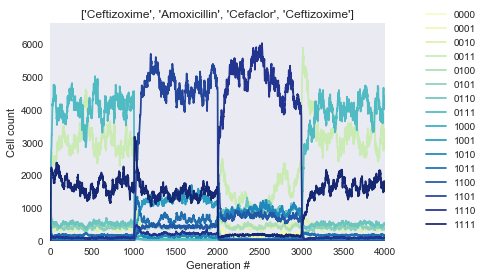

In [280]:
import matplotlib
from matplotlib.colors import ListedColormap
fit_land = np.array(landscapes[4].landscape)
#pop = vectorized_abm(fit_land,  # Fitness landscape
#                   n_gen=50000,  # Number of simulated generations
#                   mut_rate=0.1,  # probability of mutation per generation
#                   max_cells=10**3,  # Max number of cells
#                   death_rate=0.2,  # Death rate
#                   init_counts=None,
#                   carrying_cap=True
#                   )



# Dataset

cm_subsection = np.linspace(0,1, len(fit_land)) 
cmap = ListedColormap(sns.color_palette('YlGnBu',16))
#colors = [ matplotlib.cm.magma_r(x) for x in cm_subsection ]
colors = [ cmap(x) for x in cm_subsection ]

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(1, 1, 1)
for mm , color in enumerate(colors):
    ax.plot(np.arange(len(pop)), pop[:,mm], label=bin(mm)[2:].zfill(4),color=color);

   

ax.legend(bbox_to_anchor=(1.3,1.1))
ax.set_xlabel('Generation #')
ax.set_ylabel('Cell count');
ax.set_xlim([0, len(pop)])
ax.set_ylim([0, np.max(pop)*1.1])

#ax.axis('on')
#ax.set_facecolor('white')
plt.title([landscapes[x].name for x in (threedrugcycles[49][0][0:3]+[threedrugcycles[49][0][0]])]) 
ax.grid('false')
#plt.title(landscapes[4].name)
#plt.show()
plt.savefig('1000gencycle49.png', bbox_inches='tight',figsize=(4, 3),dpi=200)

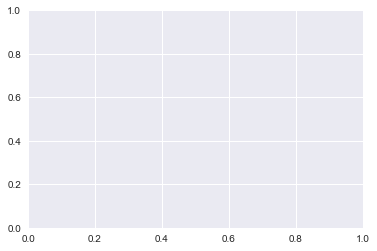

In [283]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import matplotlib.gridspec as gridspec

from moviepy.video.io.bindings import mplfig_to_npimage
import moviepy.editor as mpy
import seaborn as sns
from scipy.stats import entropy

from matplotlib.colors import ListedColormap

sns.set()
num_fps=100

fit_land = np.zeros(16)
ax = fig.add_subplot(1, 1, 1)
ax.grid('false')
cm_subsection = np.linspace(0,1, len(fit_land)) 

#colors = [ matplotlib.cm.viridis(x) for x in cm_subsection ]


cmap = ListedColormap(sns.color_palette('YlGnBu',16))

colors = [ cmap(x) for x in cm_subsection ]

def make_frame(t):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    nn = int(t*10*num_fps)

    for mm , color in enumerate(colors):
        ax.plot(np.arange(len(pop[:nn])), pop[:nn][:,mm], label=bin(mm)[2:].zfill(4),color=color);


    q = pop[nn]
    ax.legend(bbox_to_anchor=(1.3,1.1))
    ax.set_xlabel('Generation #')
    ax.set_ylabel('Cell count');

    
    #ax.set_facecolor('white')
    ax.set_xlim([0, len(pop)])
    ax.set_ylim([0, np.max(pop)*1.1])
    #plt.title([landscapes[x].name for x in (threedrugcycles[49][0][0:3]+[threedrugcycles[49][0][0]])]) 
    ax.grid('false')
    output = mplfig_to_npimage(fig)
    q=pop[nn];
    ax.clear()
    return output

animation = mpy.VideoClip(make_frame, duration=len(pop)/num_fps)







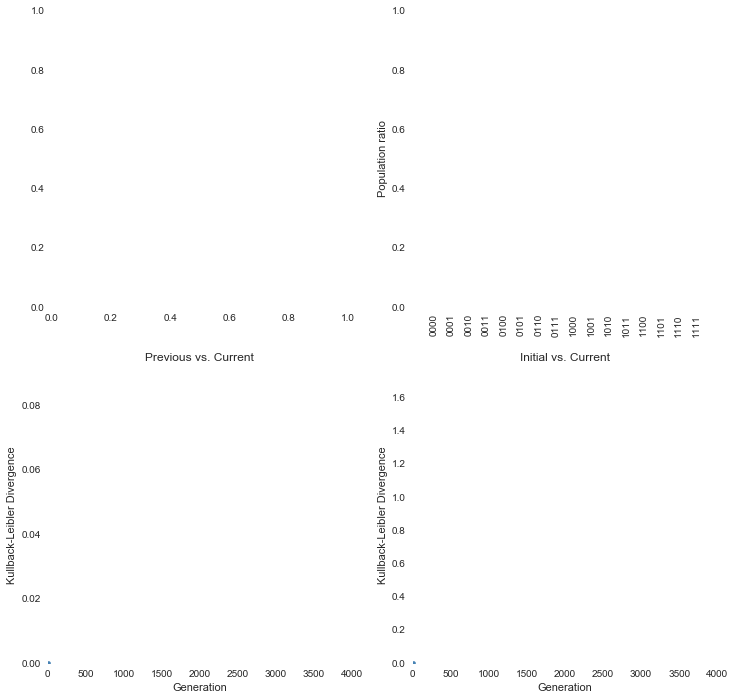

In [66]:
num_fps=100
title_str=None
counts = pop
N = len(counts)
duration = N / num_fps
n_allele = counts.shape[1]
x_data = np.arange(n_allele)
ticks = [int_to_binary(mm) for mm in x_data]
counts = np.transpose(counts.T/counts.sum(axis=1))

# Kullback-Leibler Divergence previous to current
KL_diver_prev = np.zeros(N)
# Kullback-Leibler Divergence initial to current
KL_diver_init = np.zeros(N)
for nn in range(1, N):
    KL_diver_prev[nn] = entropy(counts[nn-1], counts[nn])
    KL_diver_init[nn] = entropy(counts[0], counts[nn])

fig = plt.figure(figsize=(12, 12))
if title_str is not None:
    plt.suptitle(title_str, fontsize=20)
gs = gridspec.GridSpec(2, 2, hspace=0.2, wspace=0.2)

# Plot the population on the hypercube
ax = fig.add_subplot(gs[0])
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect(1)
ax.set_facecolor('white')

# Plot the population on the histogram
ax1 = fig.add_subplot(gs[1])
ax1.set_xticks(x_data)
ax1.set_xticklabels(ticks, rotation=90)
ax1.set_ylabel('Population ratio')
ax1.set_ylim([0, 1])
ax1.set_facecolor('white')

# Kullback-Leibler Divergence previous to current
ax2 = fig.add_subplot(gs[2])
ax2.set_xlim([0, N])
ax2.set_ylim([0, np.nanmax(KL_diver_prev)*1.1])
ax2.set_ylabel('Kullback-Leibler Divergence')
ax2.set_xlabel('Generation')
ax2.set_title("Previous vs. Current")
ax2.set_facecolor('white')

# Kullback-Leibler Divergence initial to current
ax3 = fig.add_subplot(gs[3])
ax3.set_xlim([0, N])
ax3.set_ylim([0, np.nanmax(KL_diver_init)*1.1])
ax3.set_ylabel('Kullback-Leibler Divergence')
ax3.set_xlabel('Generation')
ax3.set_title("Initial vs. Current")
ax3.set_facecolor('white')

node_scale = 400
# Make frame function for each timepoint

def make_frame(t, node_scale=node_scale):

    nn = int(t*10*num_fps)

    plot_hypercube(counts[nn], ax=ax, node_scale=node_scale)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect(1)

    points0 = ax1.bar(x_data, counts[nn], color='#4682B4')

    ax2.plot(np.arange(nn+1), KL_diver_prev[:nn+1], color='#4682B4')
    ax2.scatter(nn, KL_diver_prev[nn], color='#4682B4', s=20)

    ax3.plot(np.arange(nn+1), KL_diver_init[:nn+1], color='#4682B4')
    ax3.scatter(nn, KL_diver_init[nn], color='#4682B4', s=20)

    output = mplfig_to_npimage(fig)
    points0.remove()
    ax.clear()
    return output

animation = mpy.VideoClip(make_frame, duration=duration)



[MoviePy] Building file 1000gencycle49.gif with imageio












  0%|                                                                                         | 0/4001 [00:00<?, ?it/s]









  0%|                                                                                 | 1/4001 [00:00<15:28,  4.31it/s]









  0%|                                                                                 | 2/4001 [00:00<15:14,  4.37it/s]









  0%|                                                                                 | 3/4001 [00:00<16:20,  4.08it/s]









  0%|                                                                                 | 4/4001 [00:00<15:43,  4.23it/s]









  0%|                                                                                 | 5/4001 [00:01<15:02,  4.43it/s]









  0%|                                                                                 | 6/4001 [00:01<14:41,  4.53it/s]









  0%|▏                                                                                |

  2%|█▎                                                                              | 63/4001 [00:13<14:20,  4.58it/s]









  2%|█▎                                                                              | 64/4001 [00:13<14:20,  4.57it/s]









  2%|█▎                                                                              | 65/4001 [00:14<14:18,  4.59it/s]









  2%|█▎                                                                              | 66/4001 [00:14<14:17,  4.59it/s]









  2%|█▎                                                                              | 67/4001 [00:14<14:27,  4.54it/s]









  2%|█▎                                                                              | 68/4001 [00:15<14:31,  4.51it/s]









  2%|█▍                                                                              | 69/4001 [00:15<14:34,  4.49it/s]









  2%|█▍                                                                              | 70/4001 [0

  3%|██▍                                                                            | 126/4001 [00:28<14:37,  4.42it/s]









  3%|██▌                                                                            | 127/4001 [00:28<14:36,  4.42it/s]









  3%|██▌                                                                            | 128/4001 [00:29<14:43,  4.39it/s]









  3%|██▌                                                                            | 129/4001 [00:29<14:41,  4.39it/s]









  3%|██▌                                                                            | 130/4001 [00:29<14:42,  4.39it/s]









  3%|██▌                                                                            | 131/4001 [00:29<14:40,  4.39it/s]









  3%|██▌                                                                            | 132/4001 [00:30<14:39,  4.40it/s]









  3%|██▋                                                                            | 133/4001 [0

  5%|███▋                                                                           | 189/4001 [00:42<14:20,  4.43it/s]









  5%|███▊                                                                           | 190/4001 [00:42<14:20,  4.43it/s]









  5%|███▊                                                                           | 191/4001 [00:43<14:19,  4.43it/s]









  5%|███▊                                                                           | 192/4001 [00:43<14:19,  4.43it/s]









  5%|███▊                                                                           | 193/4001 [00:43<14:18,  4.43it/s]









  5%|███▊                                                                           | 194/4001 [00:43<14:18,  4.43it/s]









  5%|███▊                                                                           | 195/4001 [00:44<14:19,  4.43it/s]









  5%|███▊                                                                           | 196/4001 [0

  6%|████▉                                                                          | 252/4001 [00:57<14:11,  4.40it/s]









  6%|████▉                                                                          | 253/4001 [00:57<14:11,  4.40it/s]









  6%|█████                                                                          | 254/4001 [00:57<14:10,  4.40it/s]









  6%|█████                                                                          | 255/4001 [00:57<14:11,  4.40it/s]









  6%|█████                                                                          | 256/4001 [00:58<14:11,  4.40it/s]









  6%|█████                                                                          | 257/4001 [00:58<14:16,  4.37it/s]









  6%|█████                                                                          | 258/4001 [00:59<14:16,  4.37it/s]









  6%|█████                                                                          | 259/4001 [0

  8%|██████▏                                                                        | 315/4001 [01:12<14:14,  4.32it/s]









  8%|██████▏                                                                        | 316/4001 [01:13<14:15,  4.31it/s]









  8%|██████▎                                                                        | 317/4001 [01:13<14:15,  4.31it/s]









  8%|██████▎                                                                        | 318/4001 [01:13<14:14,  4.31it/s]









  8%|██████▎                                                                        | 319/4001 [01:14<14:14,  4.31it/s]









  8%|██████▎                                                                        | 320/4001 [01:14<14:15,  4.30it/s]









  8%|██████▎                                                                        | 321/4001 [01:14<14:15,  4.30it/s]









  8%|██████▎                                                                        | 322/4001 [0

  9%|███████▍                                                                       | 378/4001 [01:30<14:27,  4.18it/s]









  9%|███████▍                                                                       | 379/4001 [01:30<14:27,  4.18it/s]









  9%|███████▌                                                                       | 380/4001 [01:30<14:26,  4.18it/s]









 10%|███████▌                                                                       | 381/4001 [01:31<14:26,  4.18it/s]









 10%|███████▌                                                                       | 382/4001 [01:31<14:26,  4.18it/s]









 10%|███████▌                                                                       | 383/4001 [01:31<14:26,  4.17it/s]









 10%|███████▌                                                                       | 384/4001 [01:32<14:26,  4.17it/s]









 10%|███████▌                                                                       | 385/4001 [0

IndexError: index 4000 is out of bounds for axis 0 with size 4000

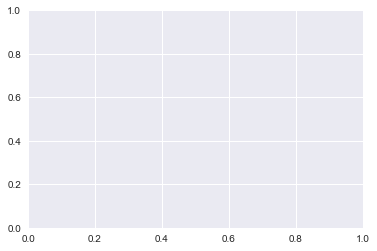

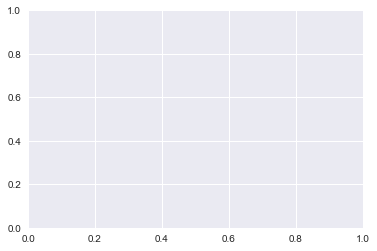

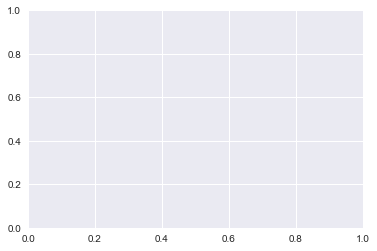

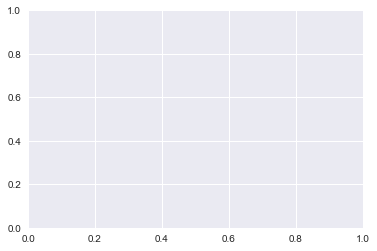

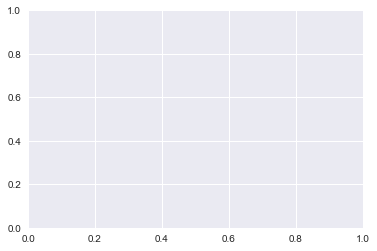

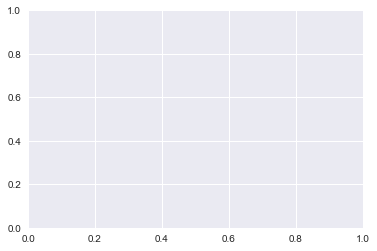

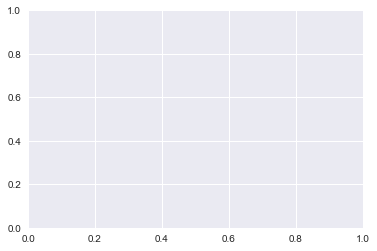

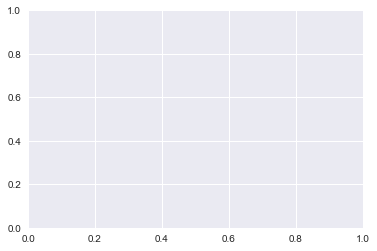

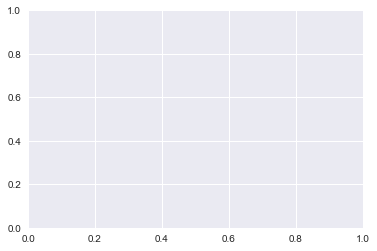

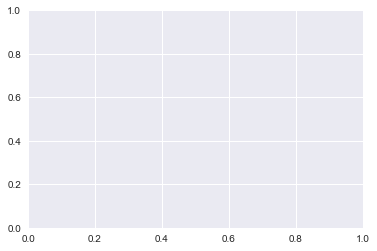

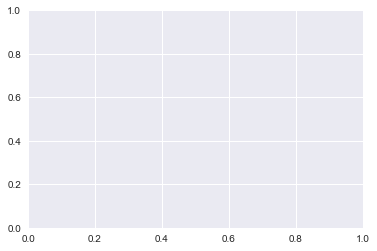

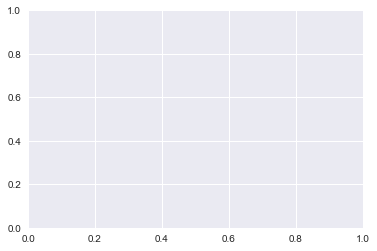

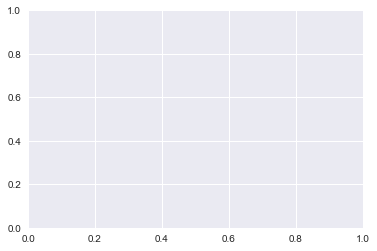

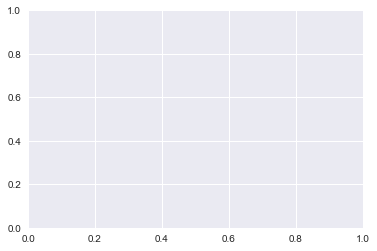

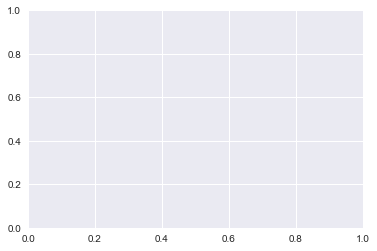

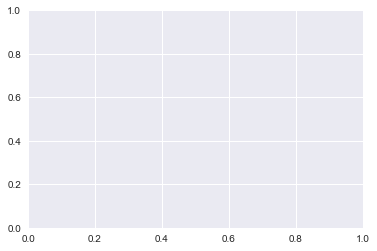

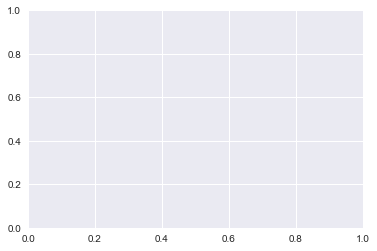

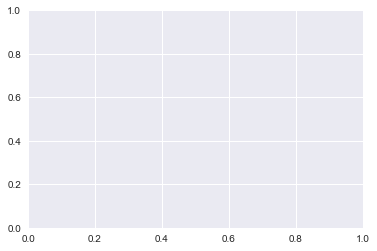

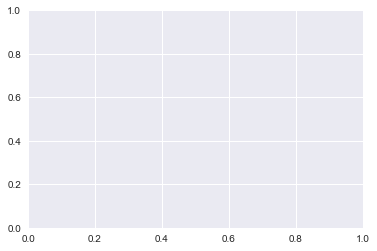

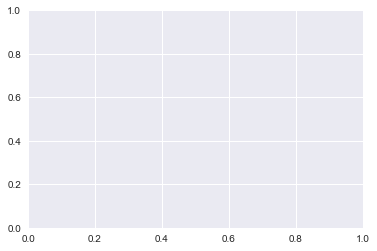

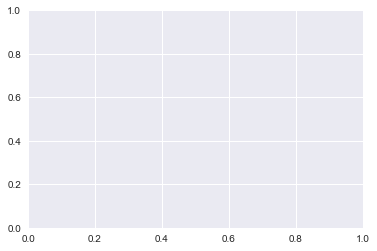

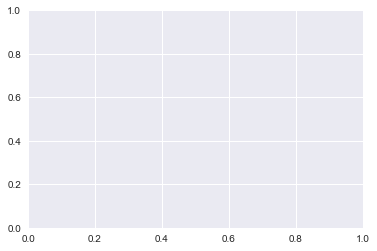

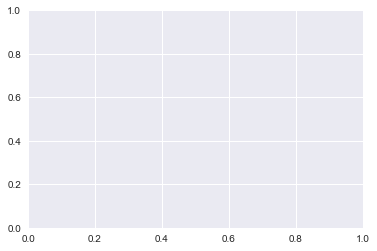

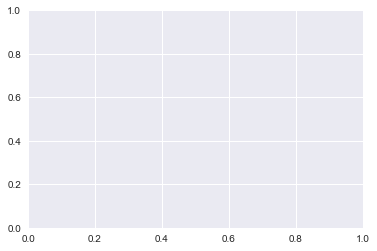

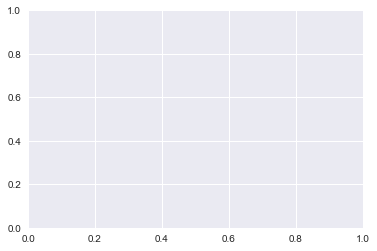

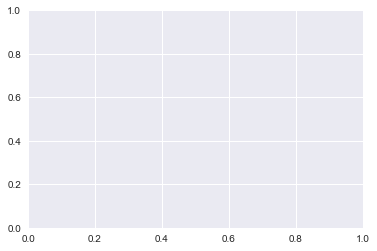

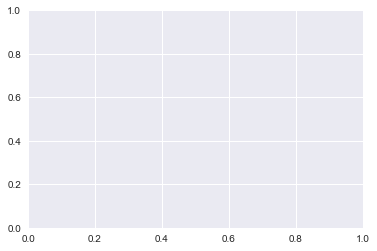

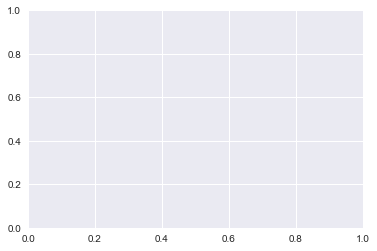

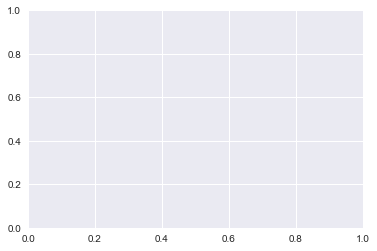

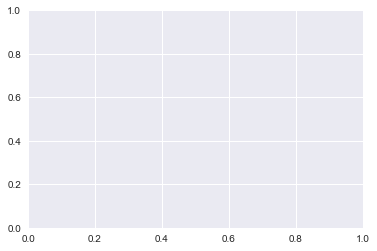

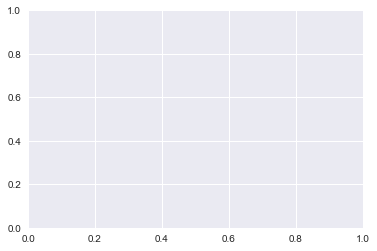

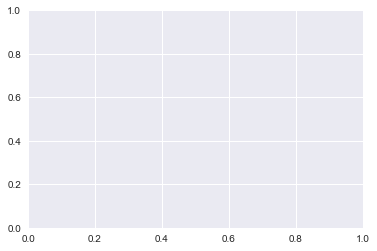

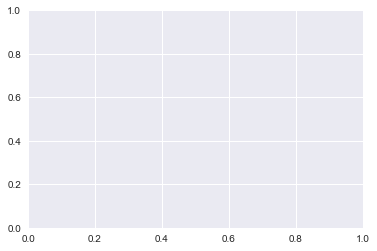

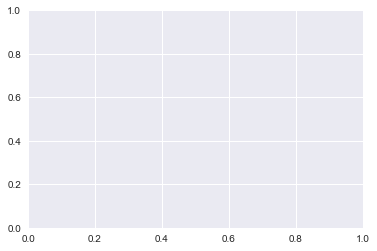

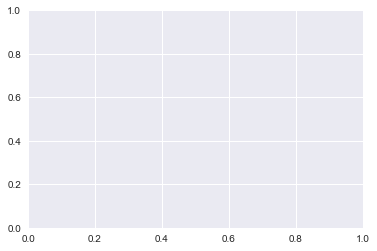

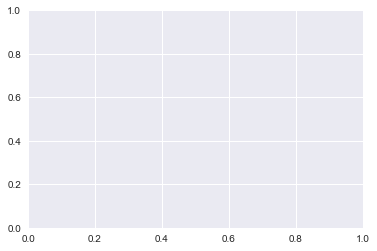

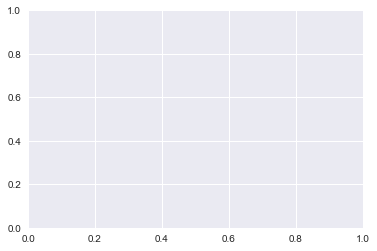

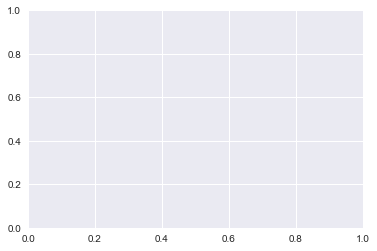

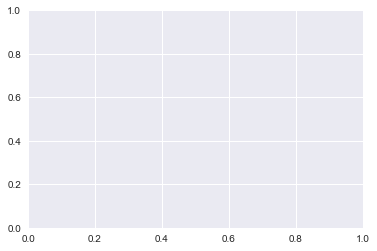

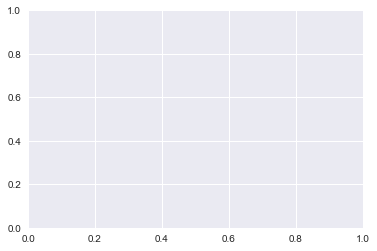

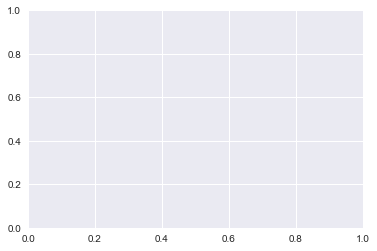

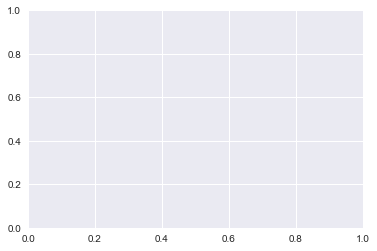

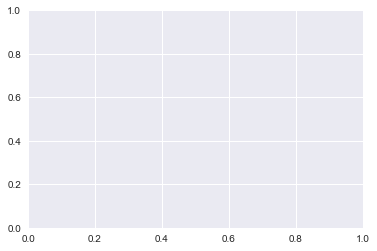

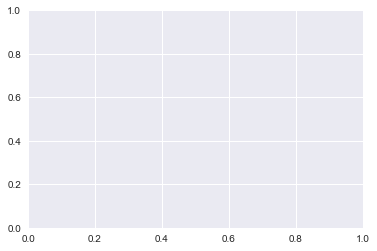

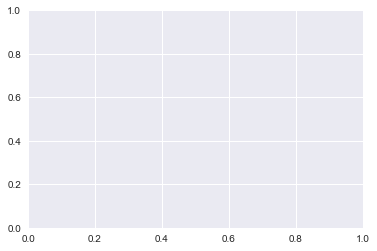

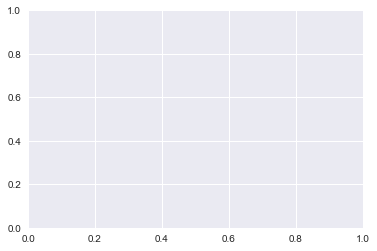

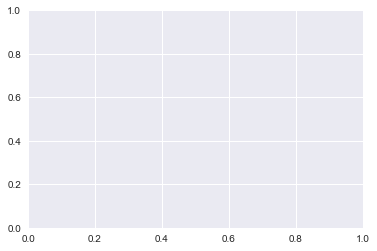

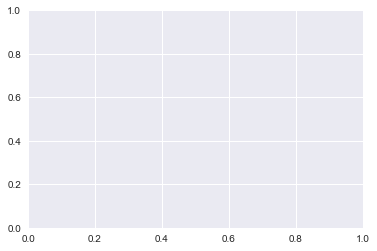

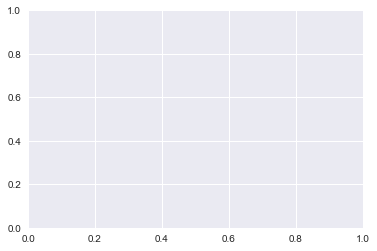

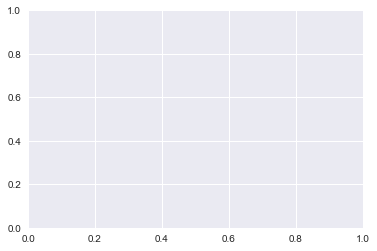

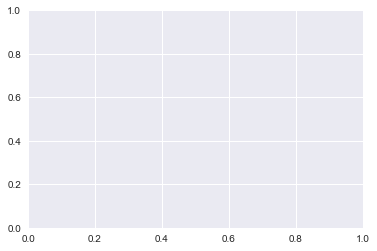

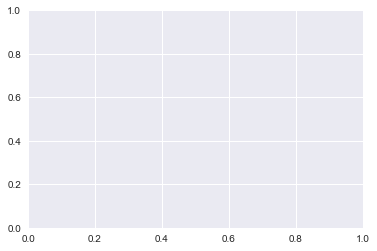

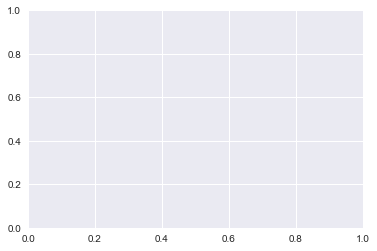

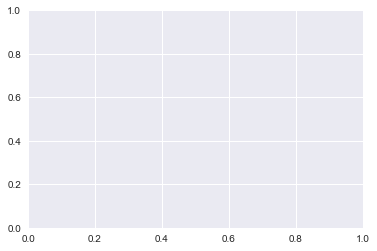

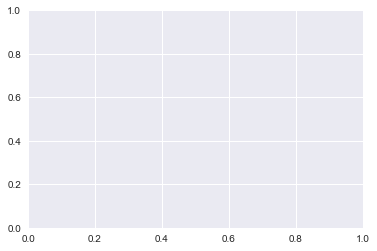

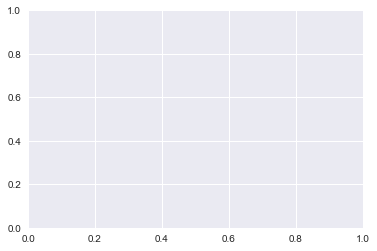

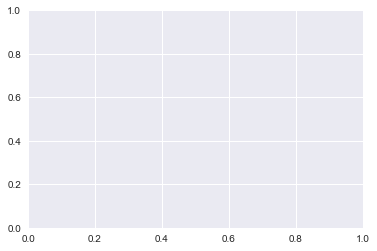

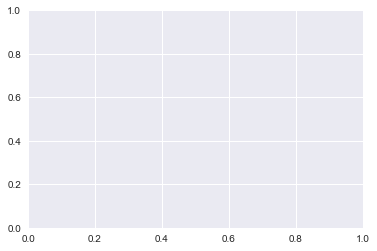

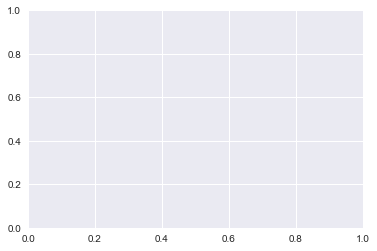

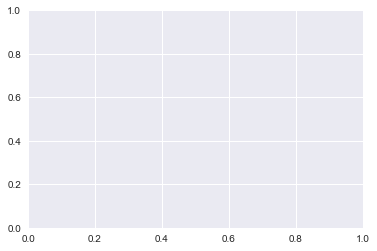

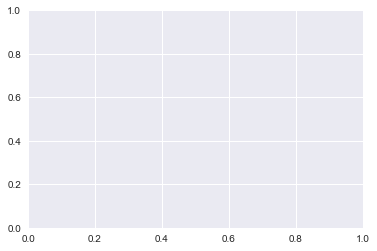

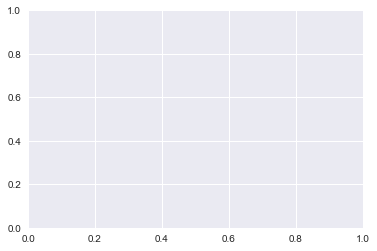

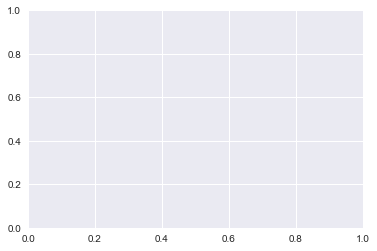

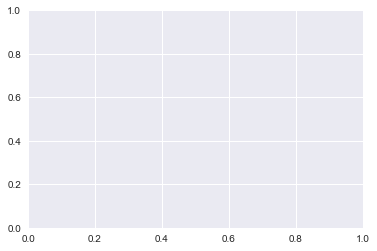

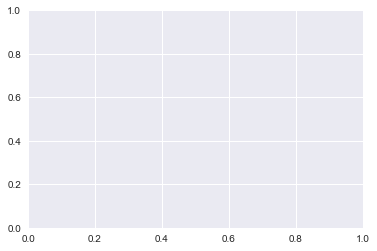

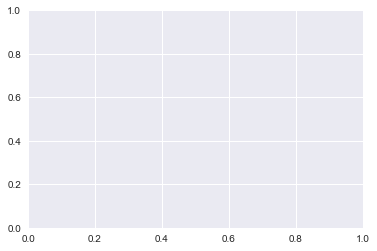

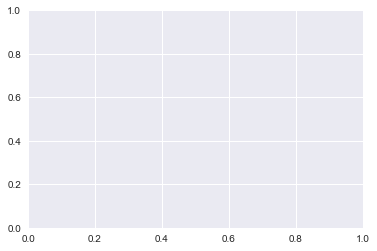

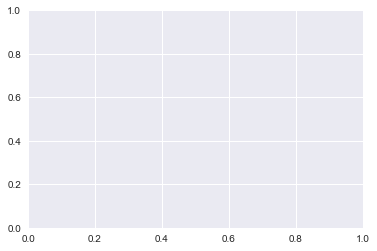

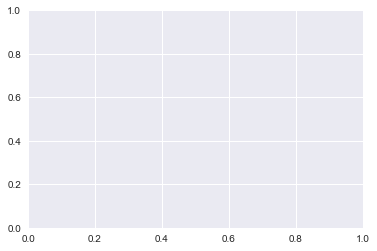

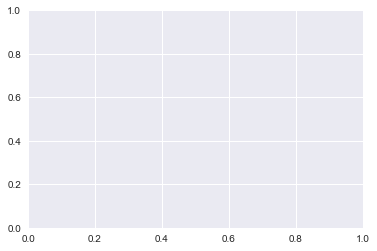

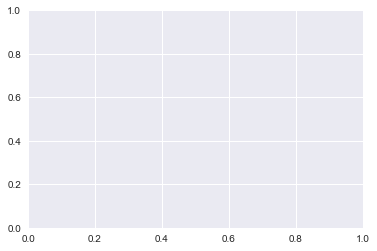

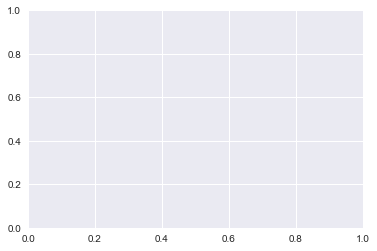

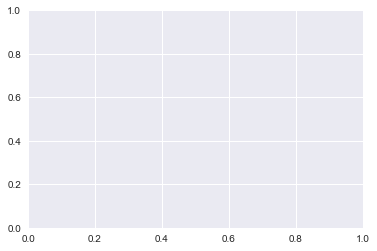

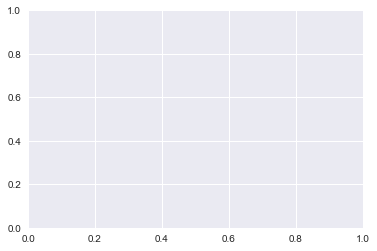

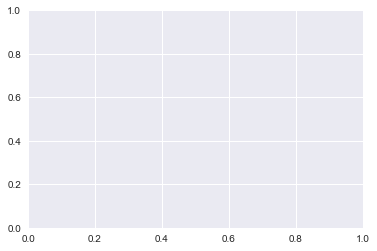

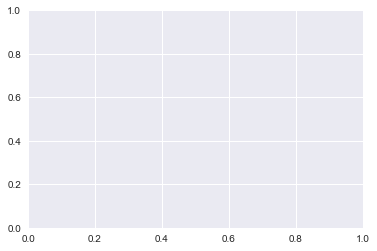

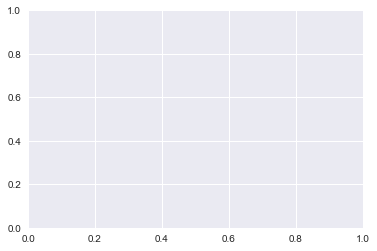

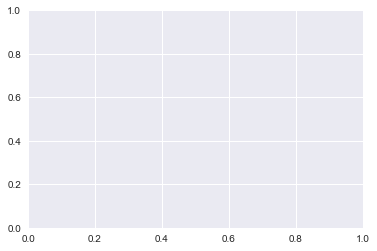

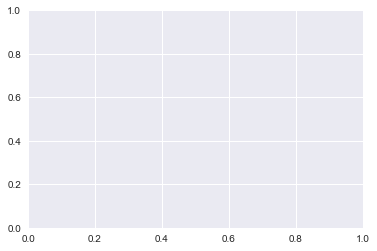

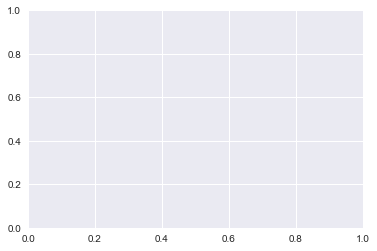

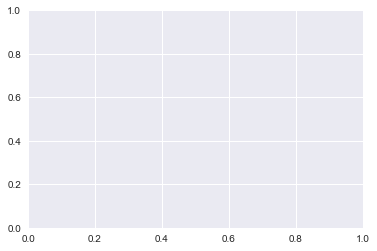

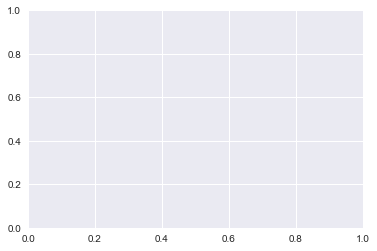

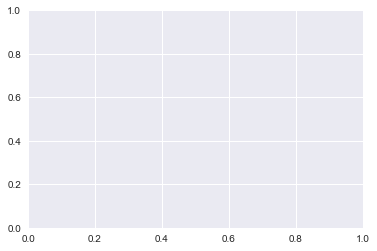

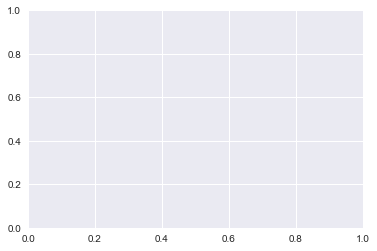

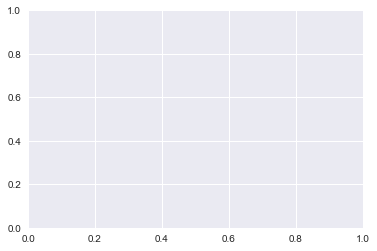

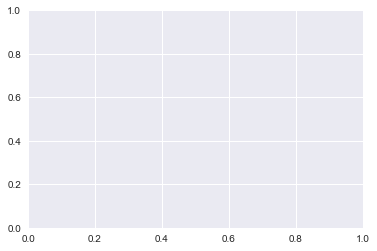

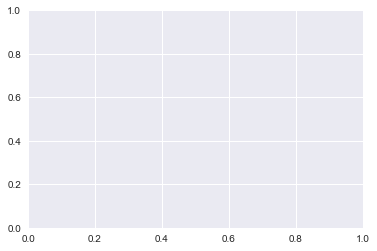

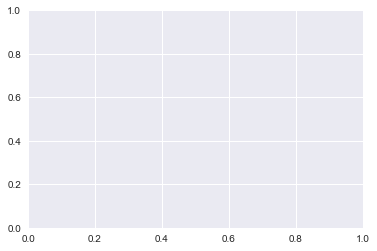

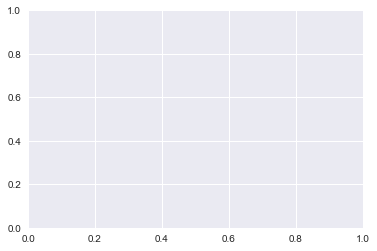

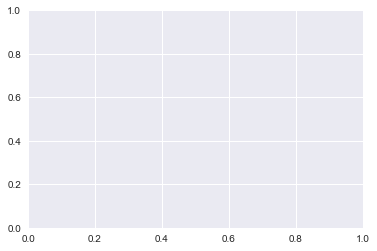

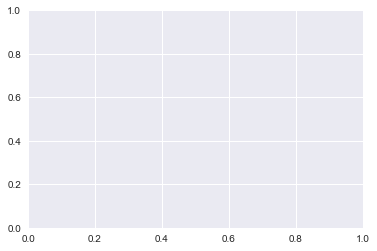

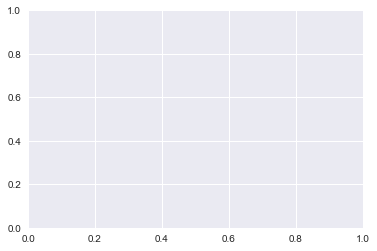

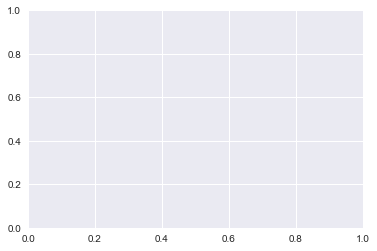

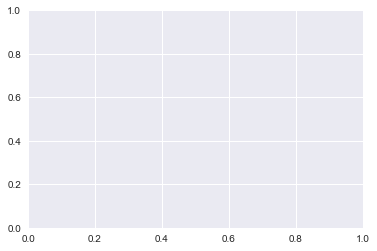

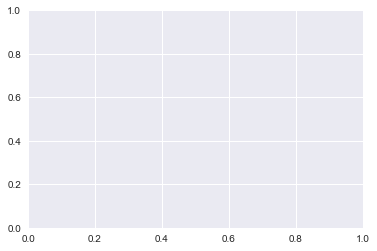

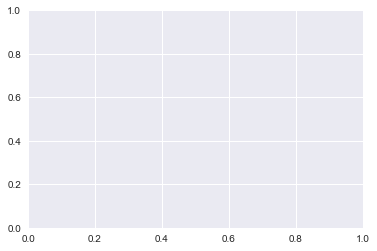

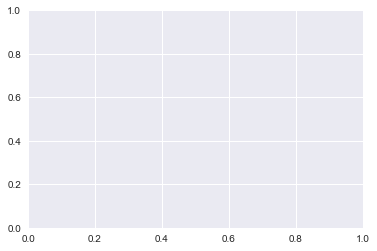

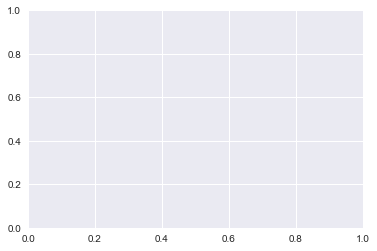

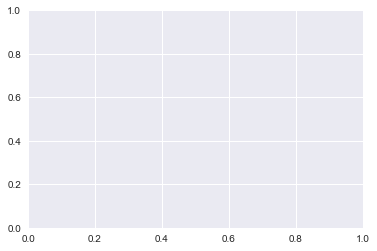

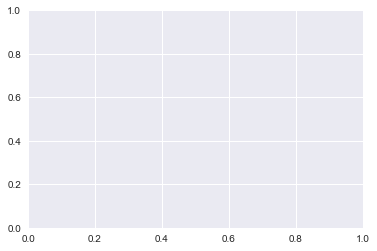

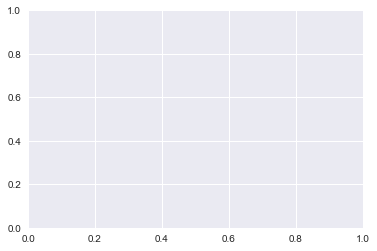

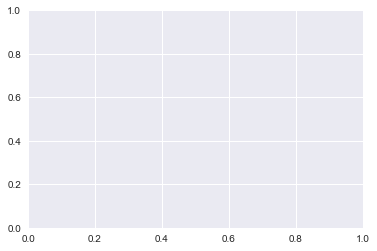

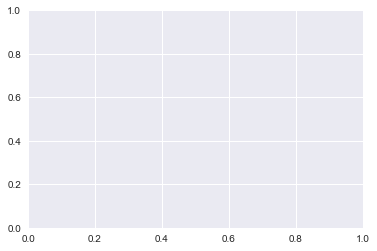

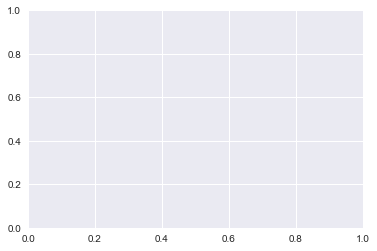

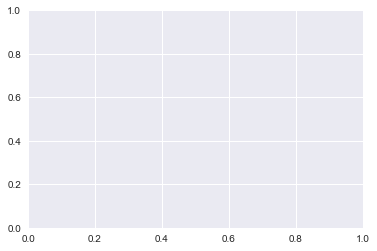

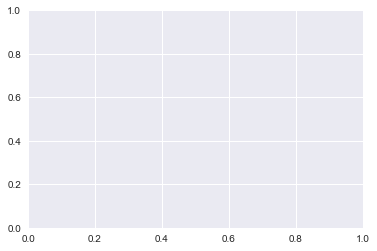

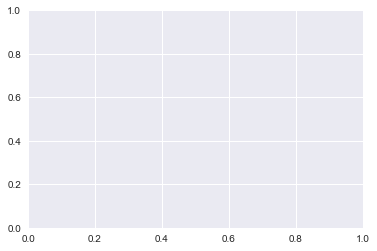

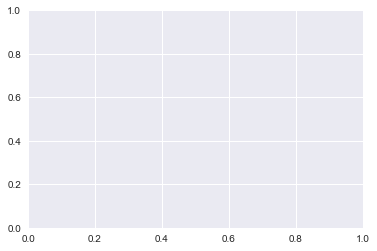

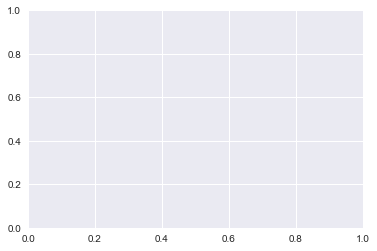

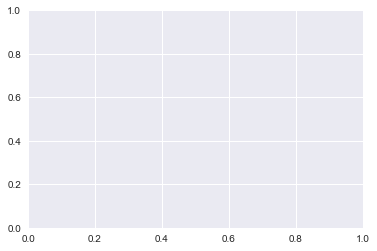

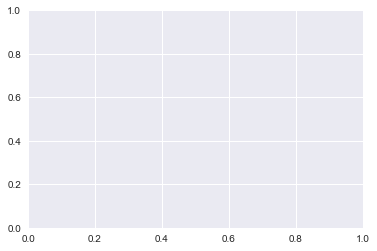

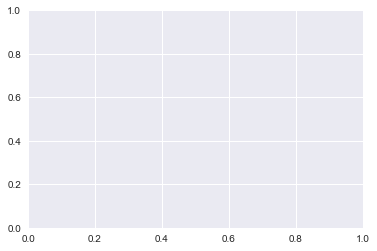

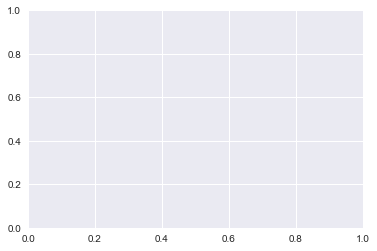

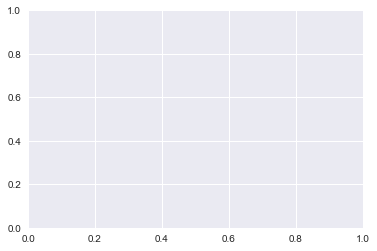

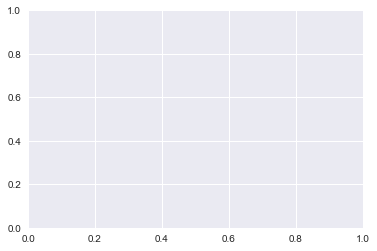

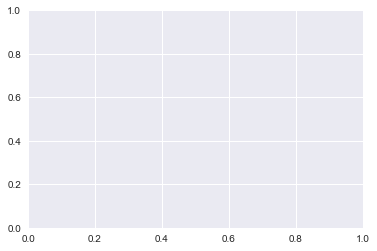

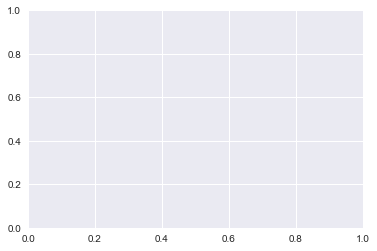

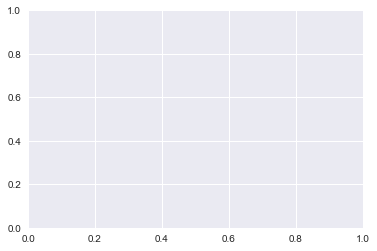

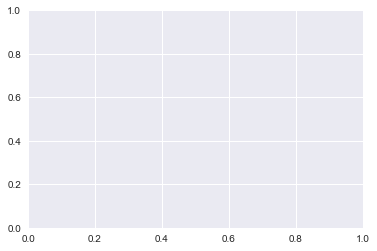

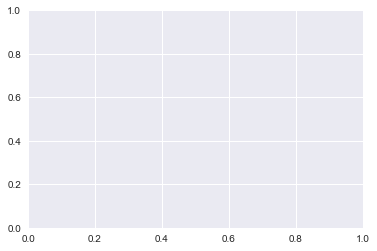

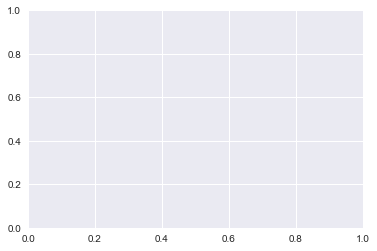

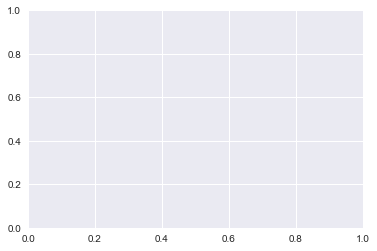

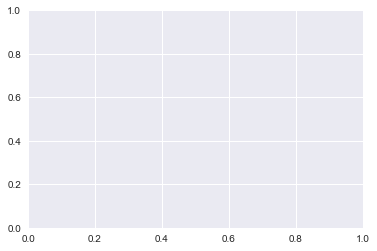

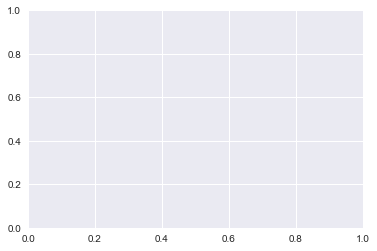

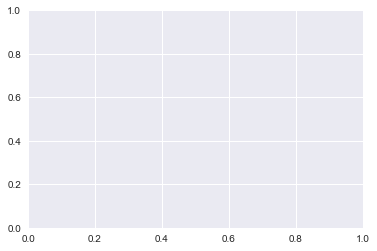

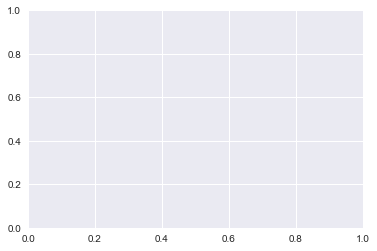

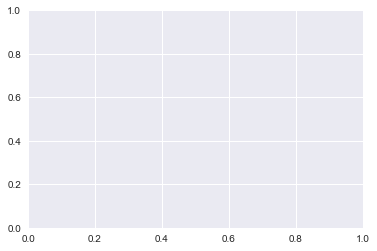

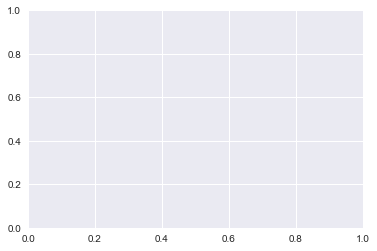

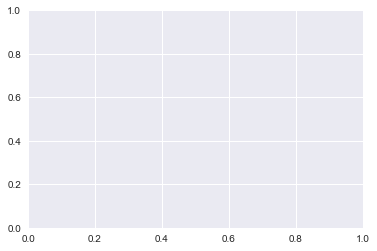

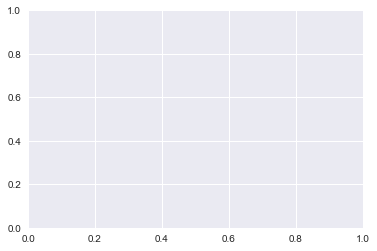

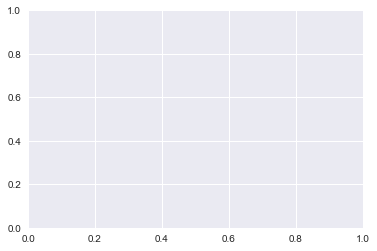

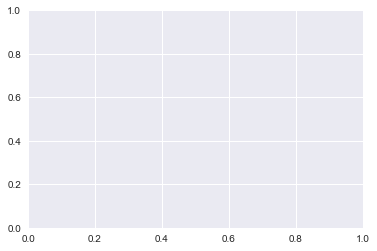

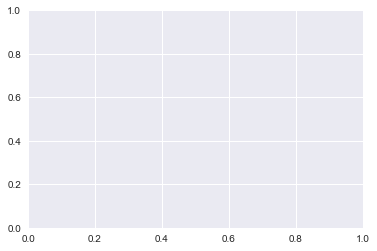

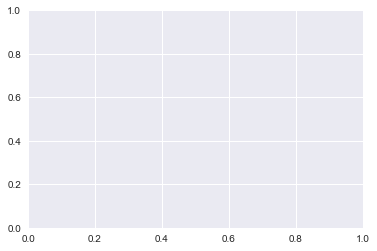

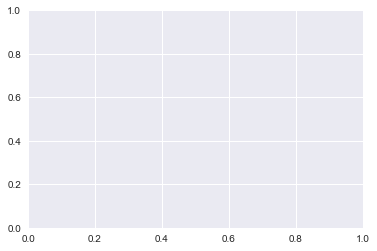

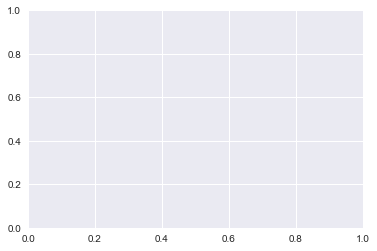

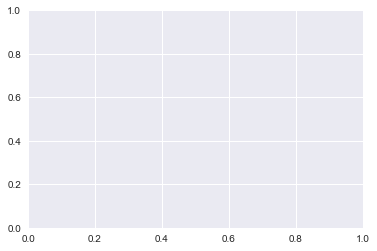

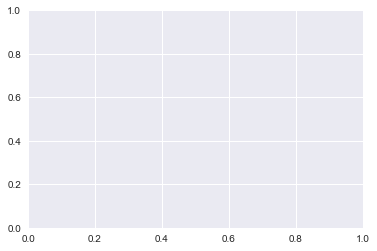

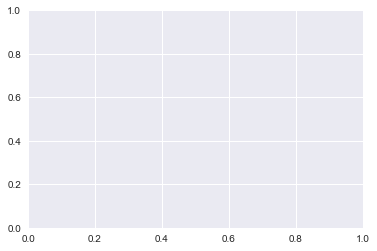

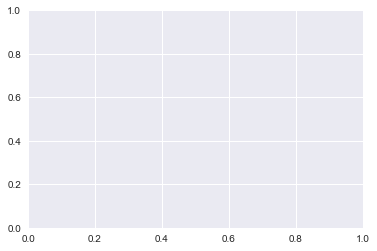

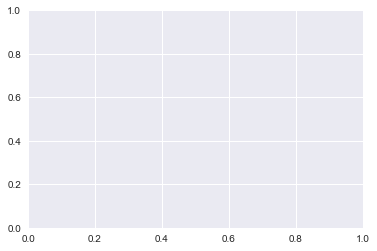

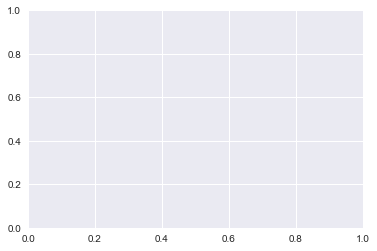

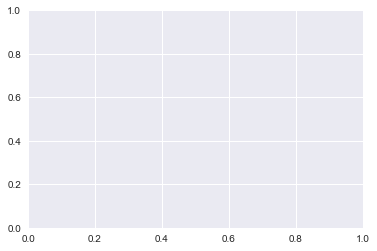

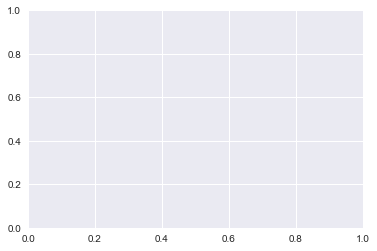

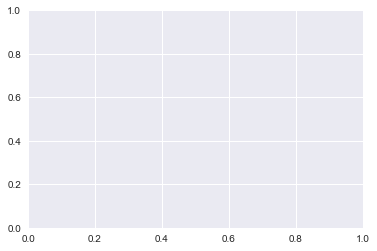

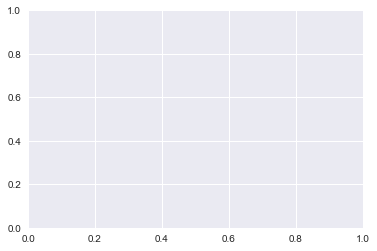

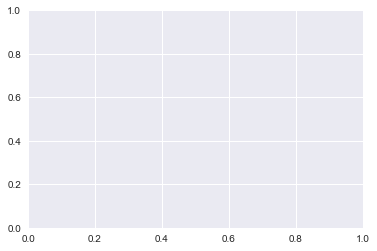

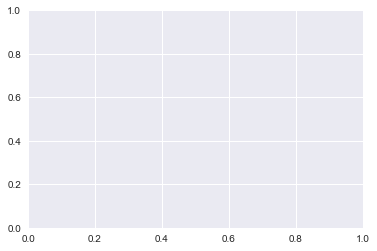

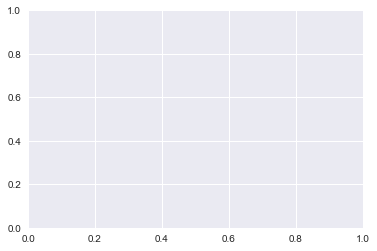

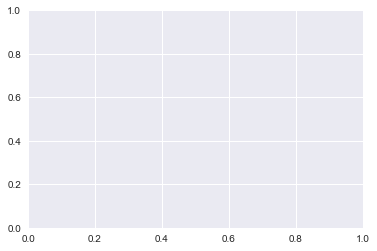

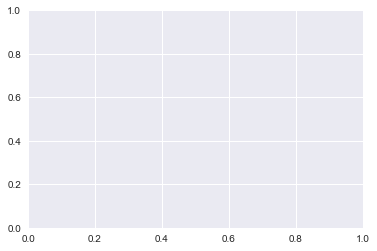

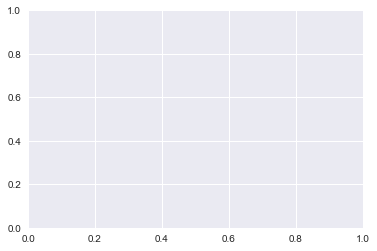

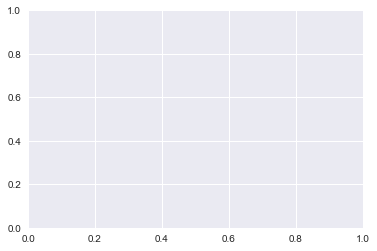

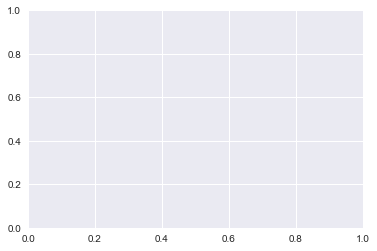

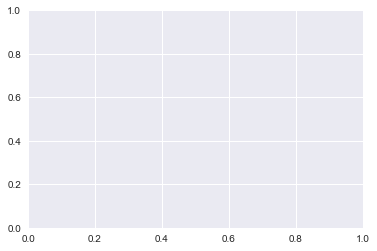

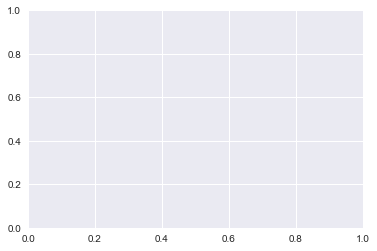

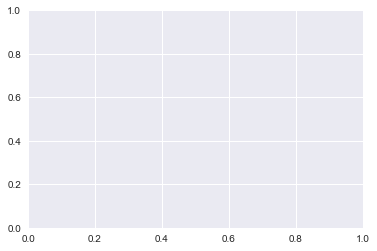

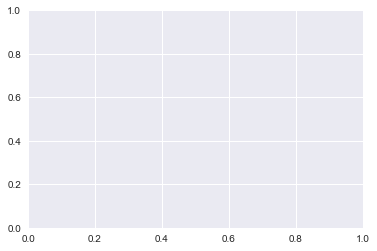

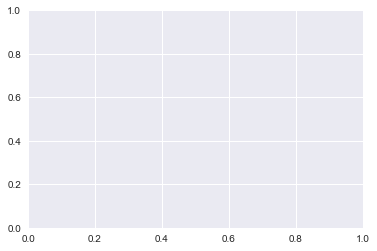

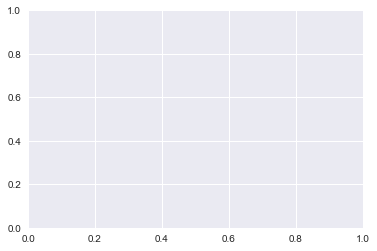

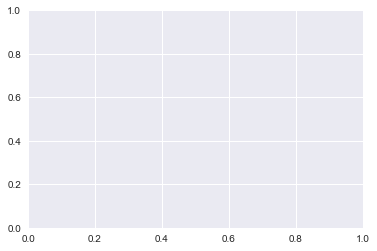

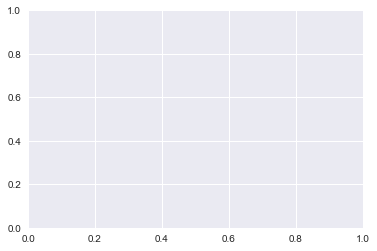

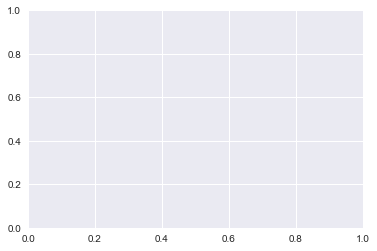

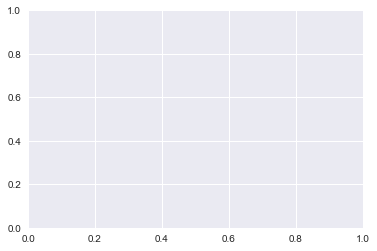

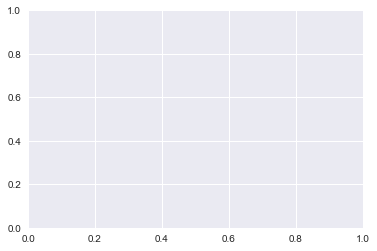

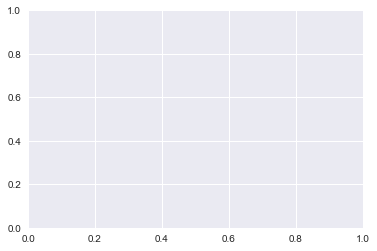

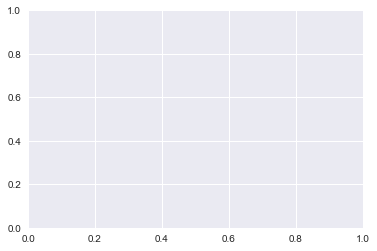

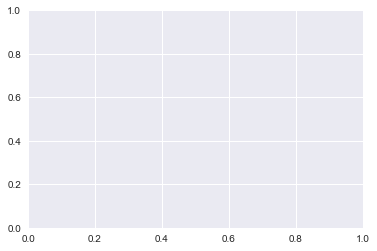

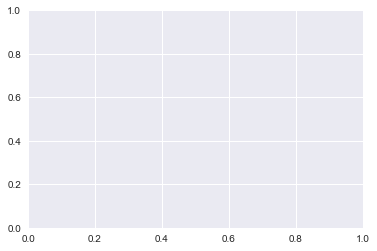

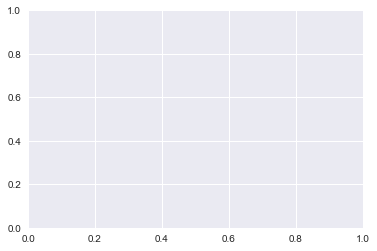

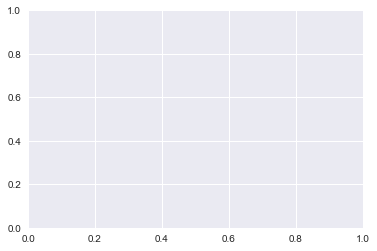

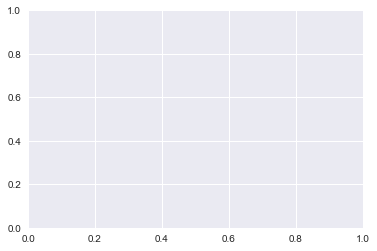

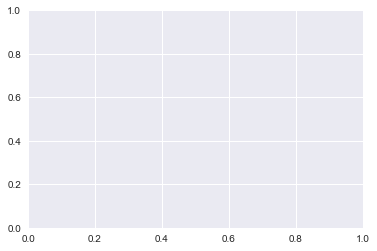

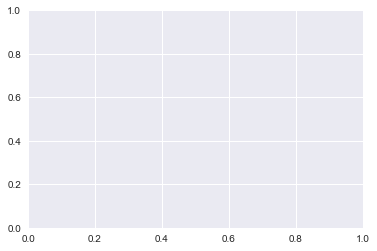

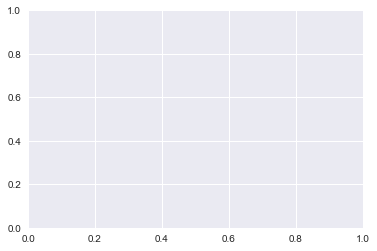

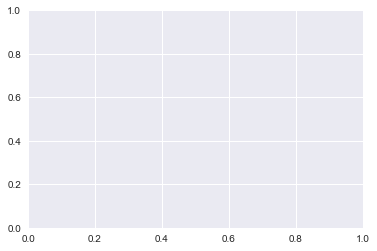

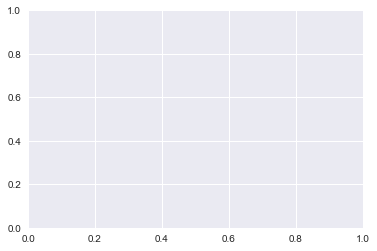

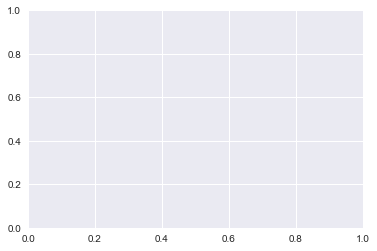

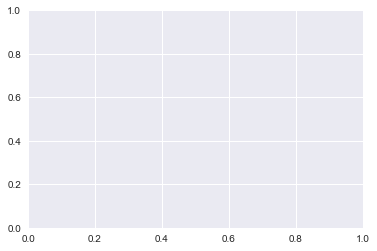

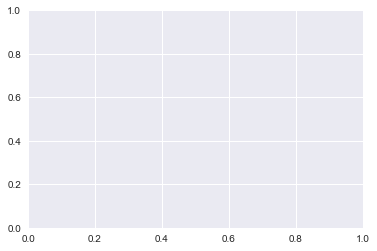

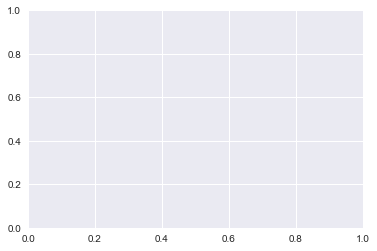

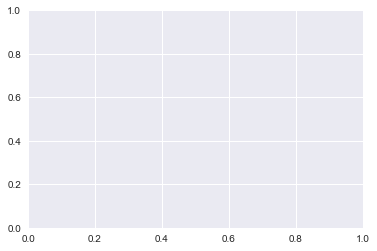

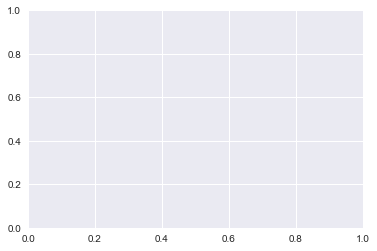

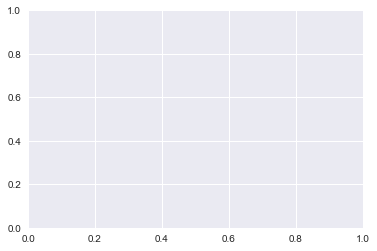

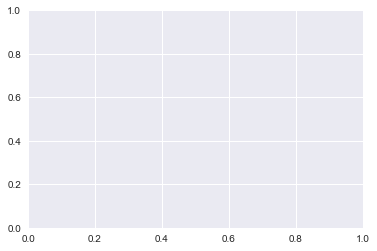

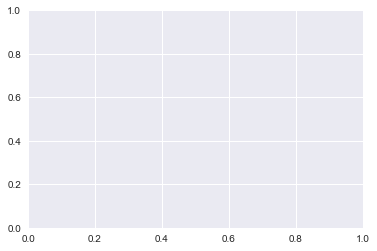

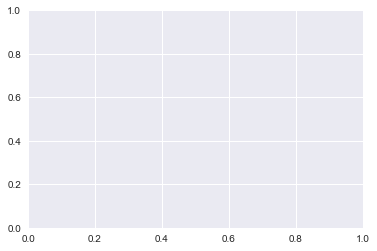

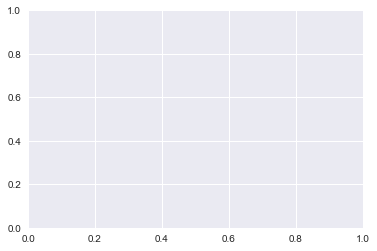

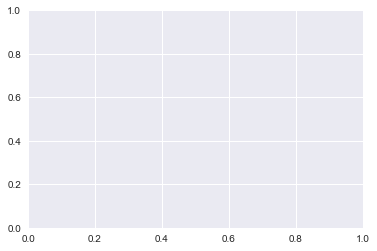

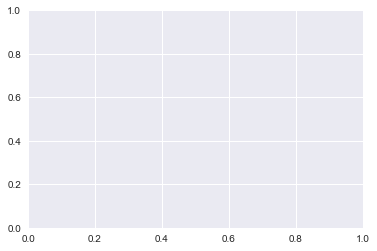

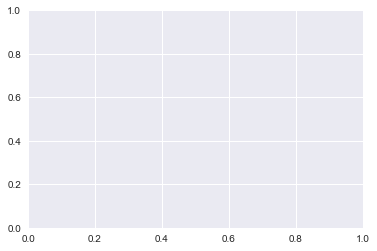

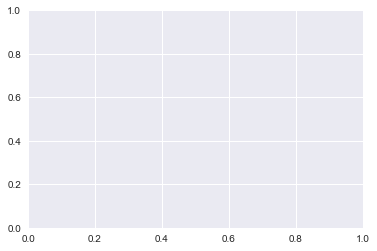

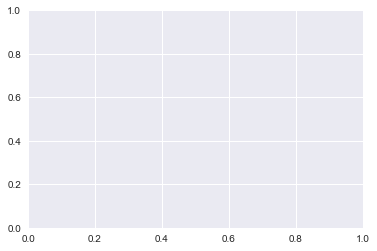

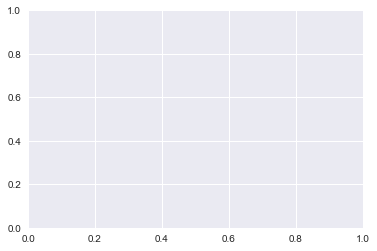

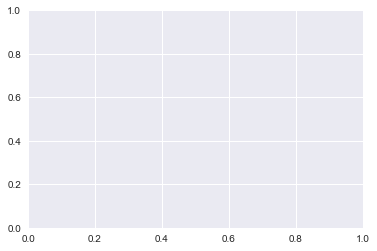

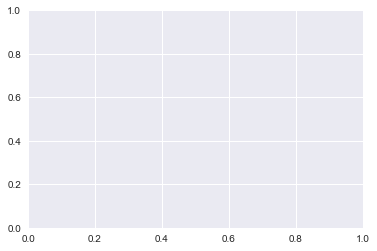

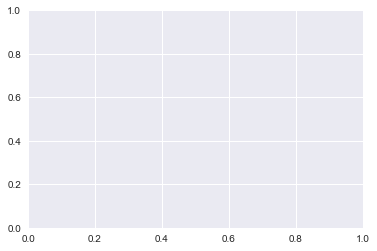

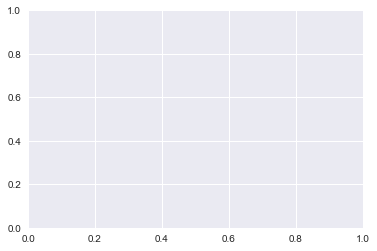

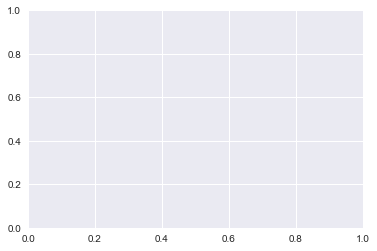

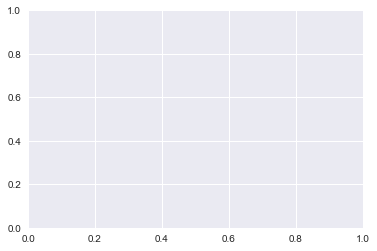

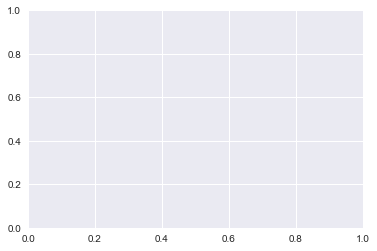

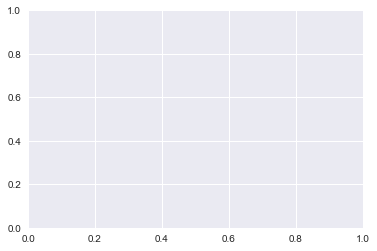

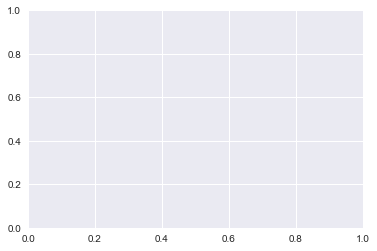

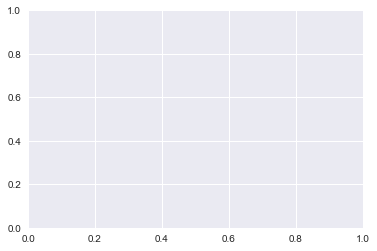

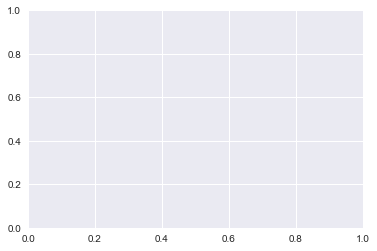

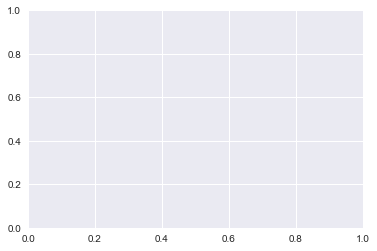

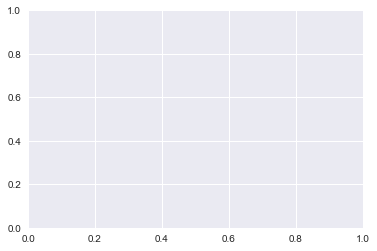

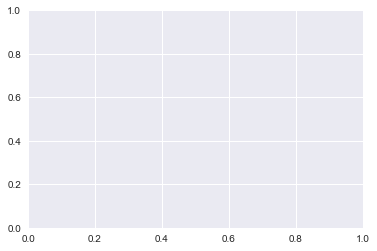

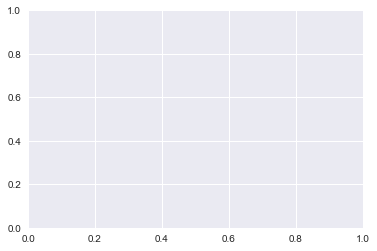

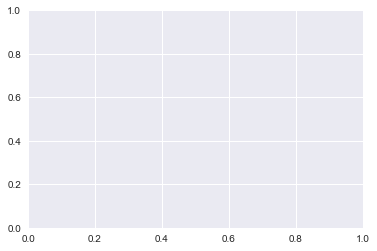

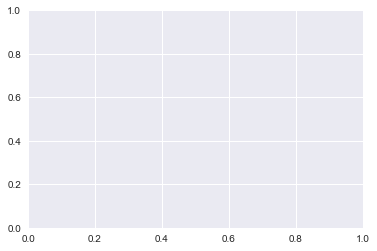

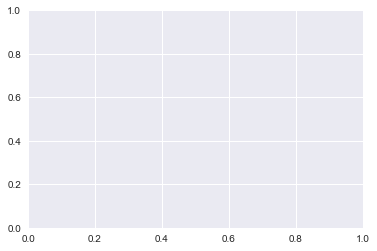

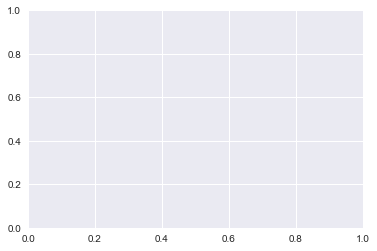

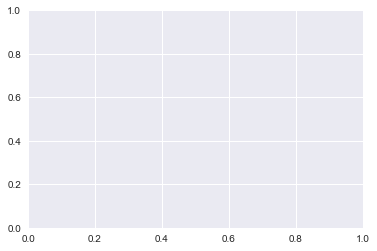

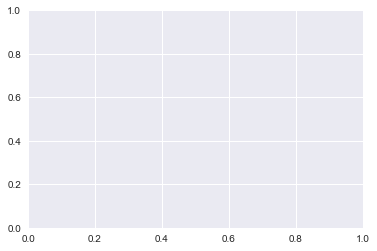

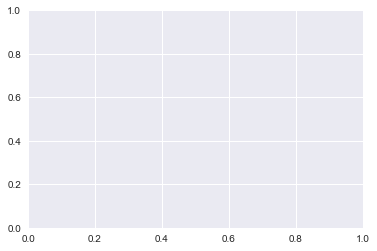

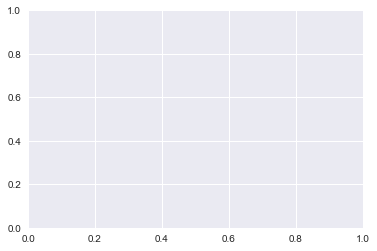

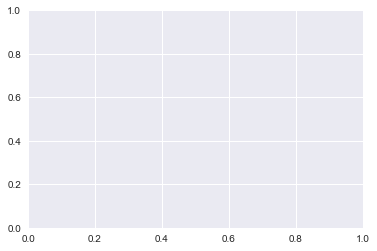

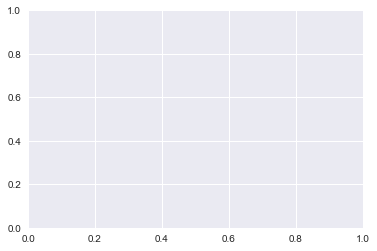

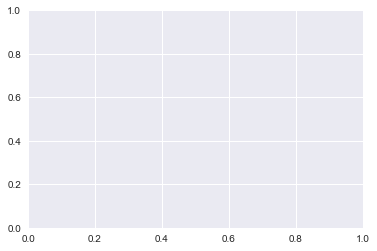

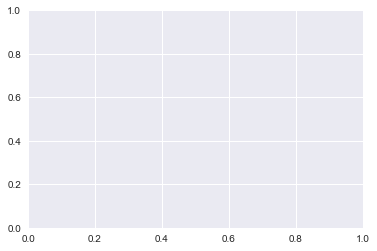

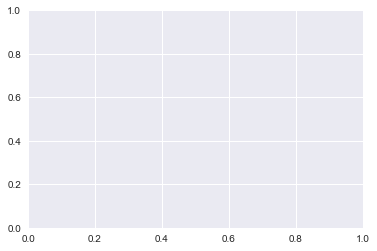

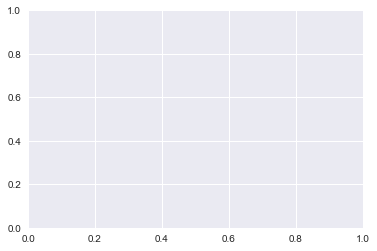

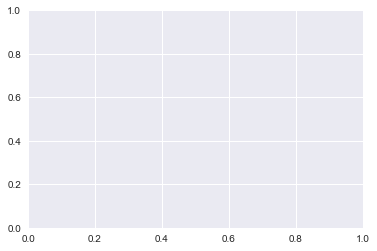

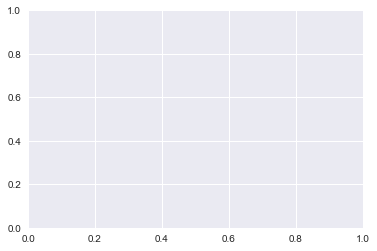

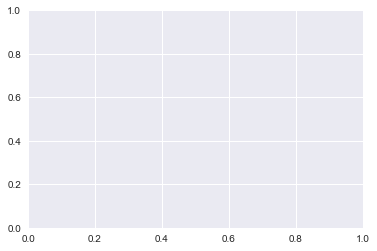

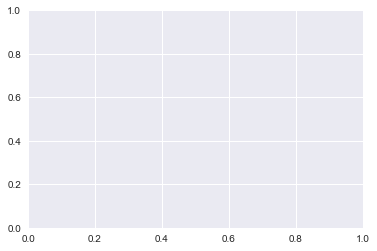

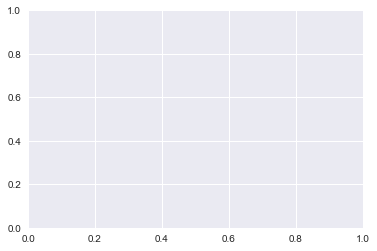

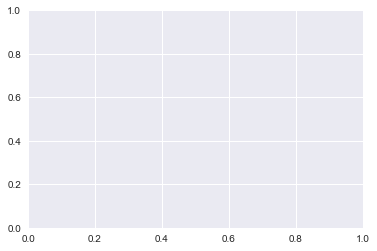

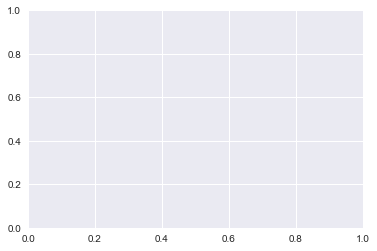

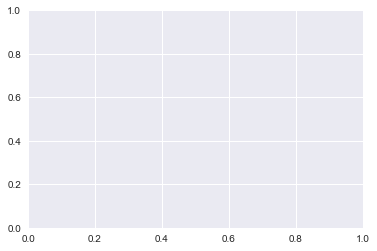

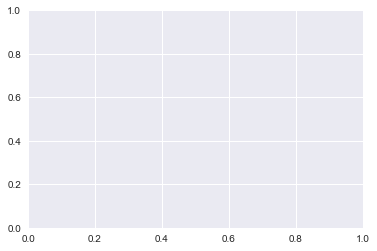

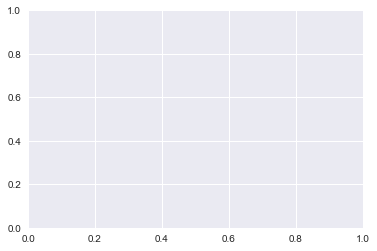

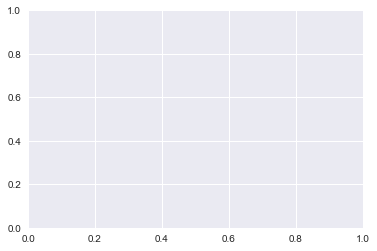

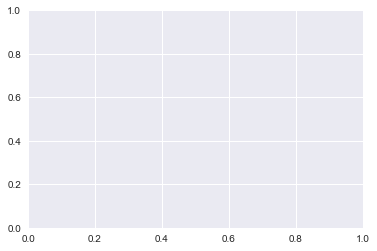

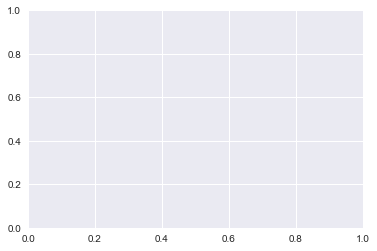

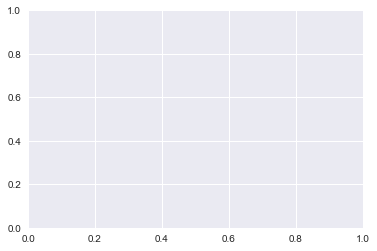

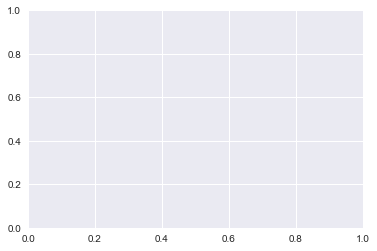

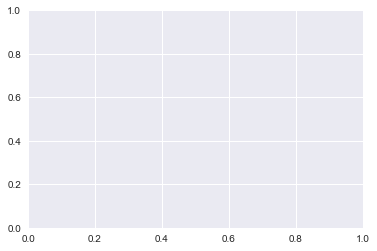

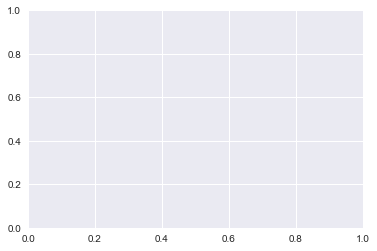

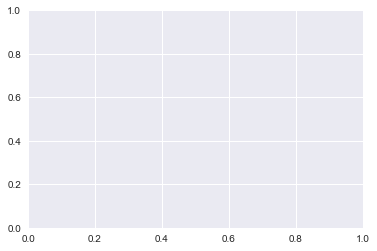

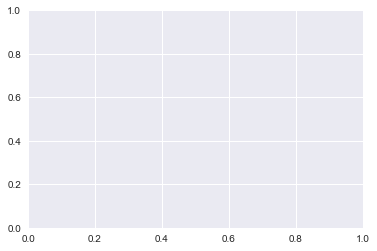

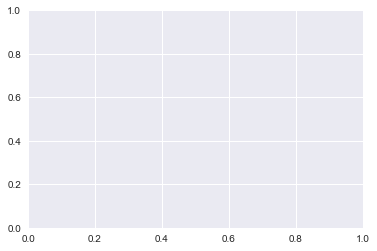

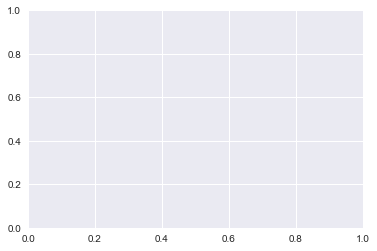

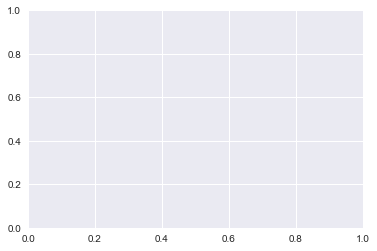

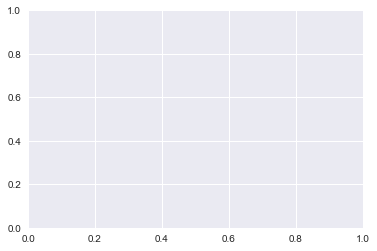

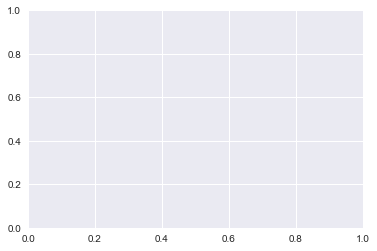

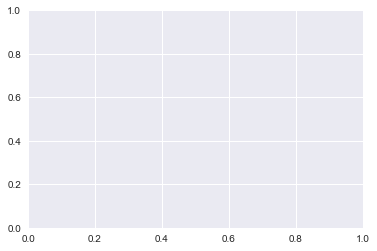

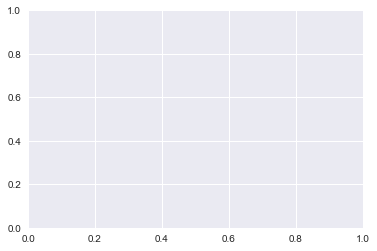

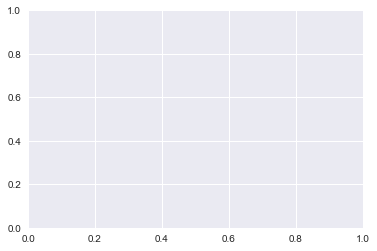

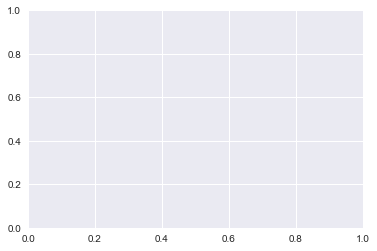

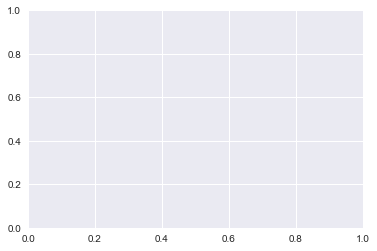

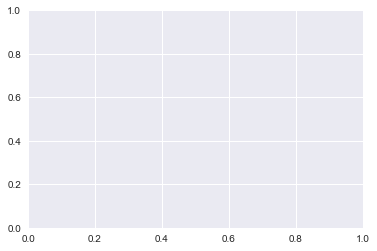

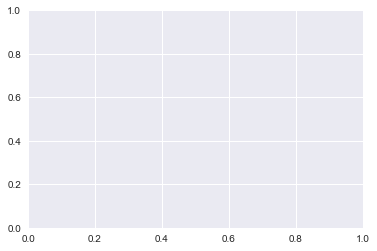

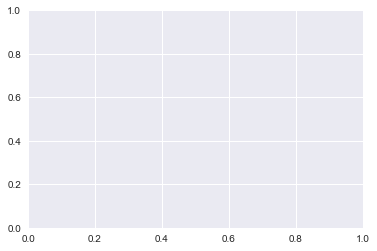

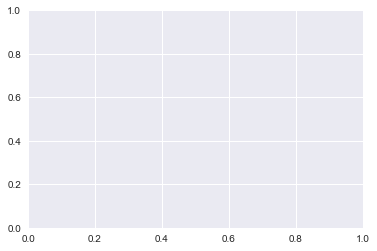

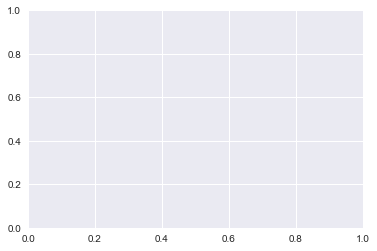

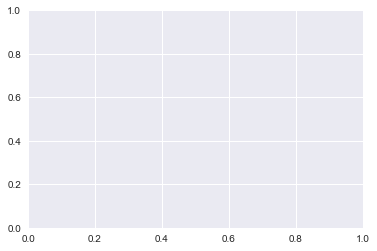

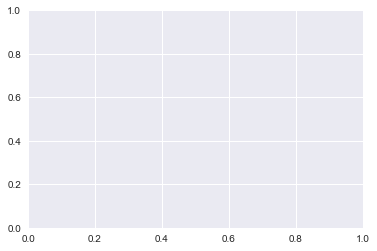

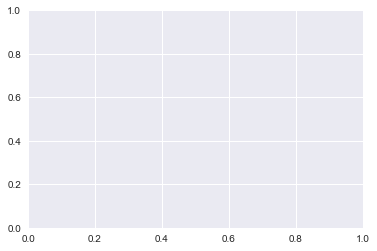

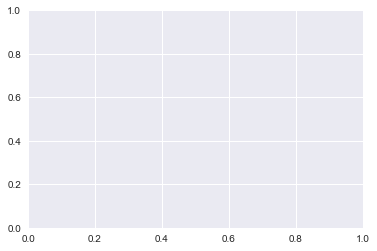

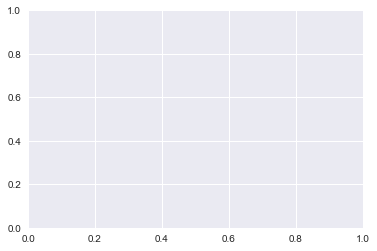

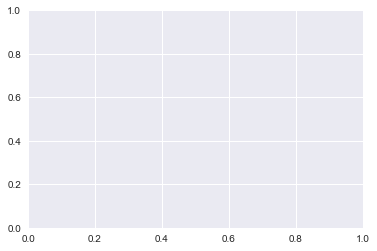

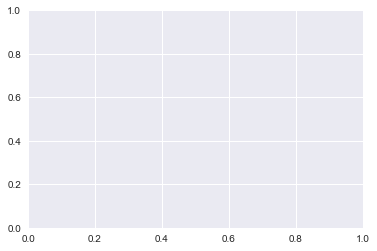

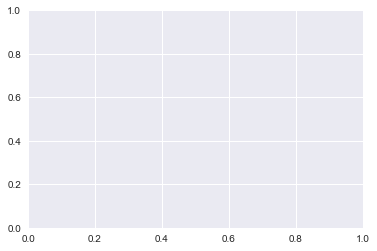

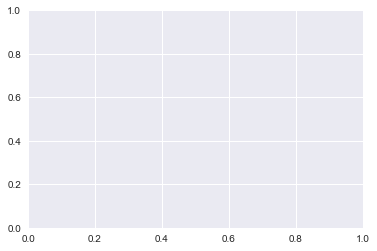

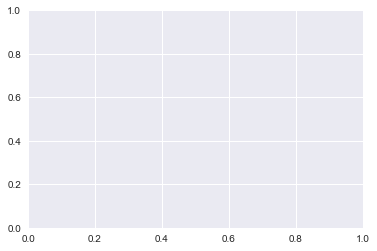

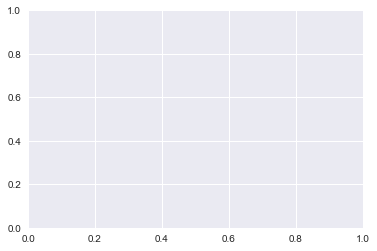

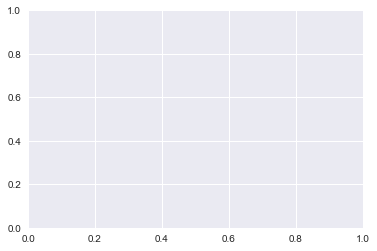

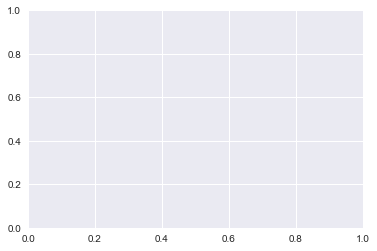

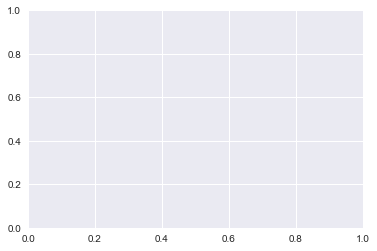

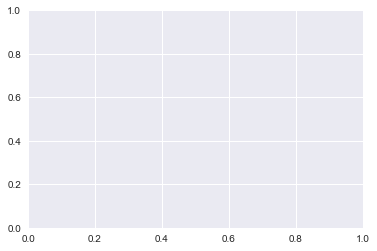

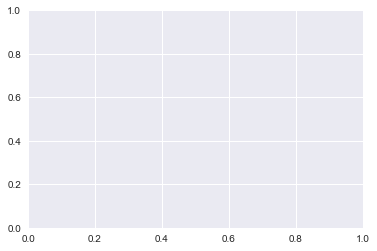

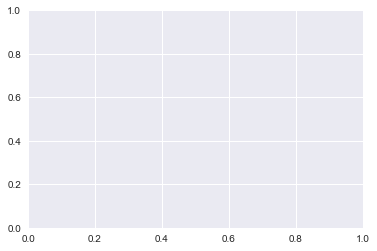

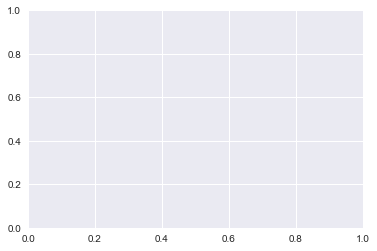

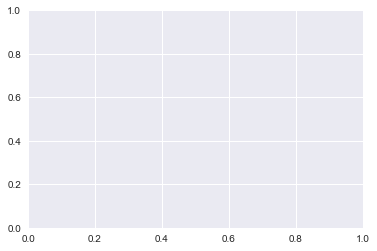

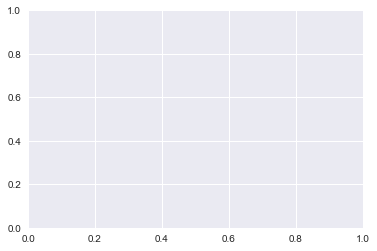

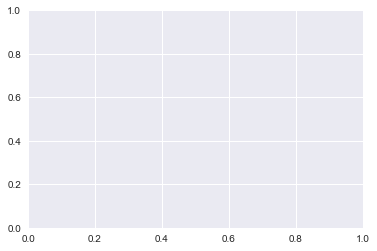

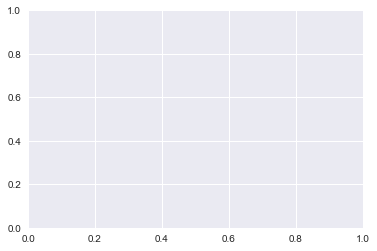

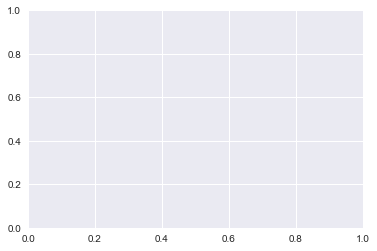

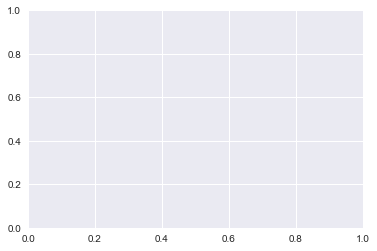

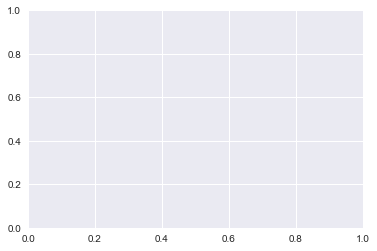

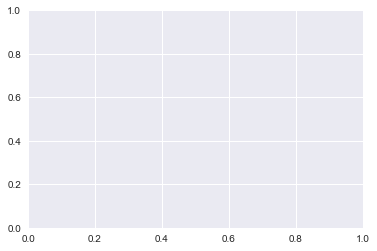

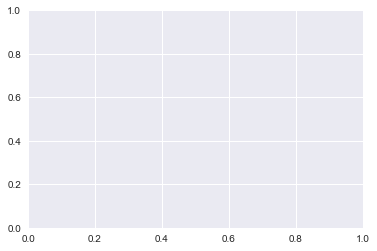

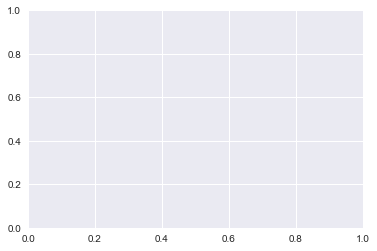

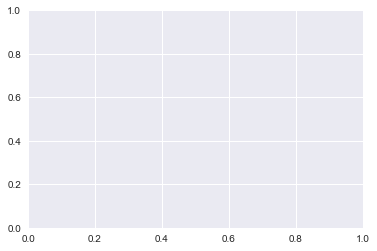

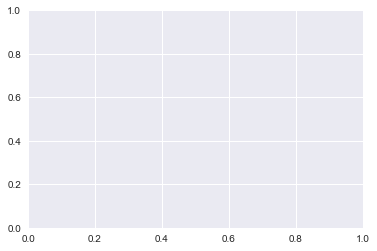

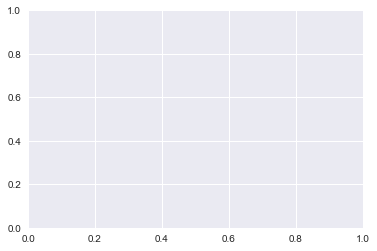

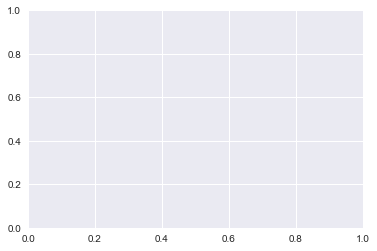

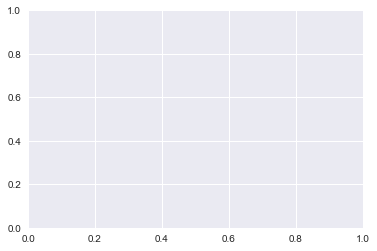

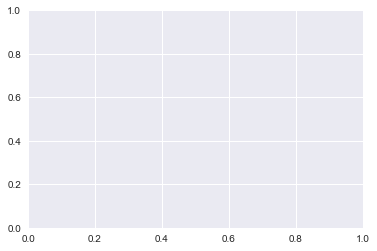

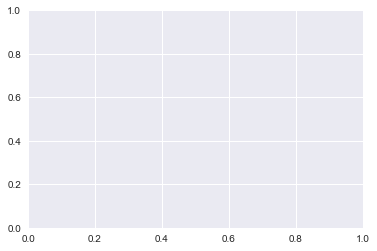

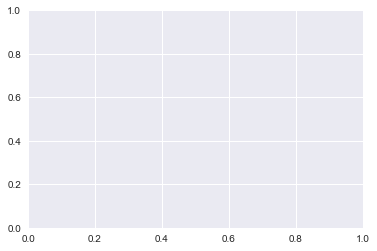

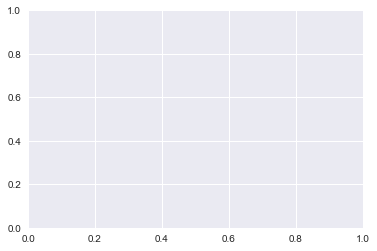

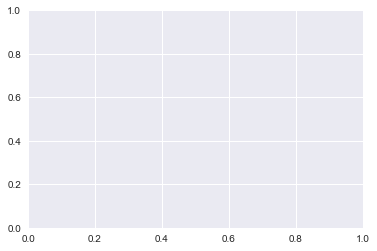

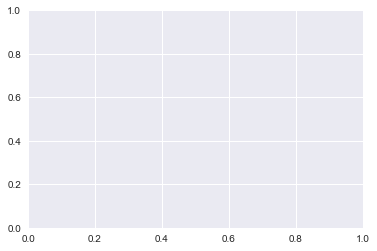

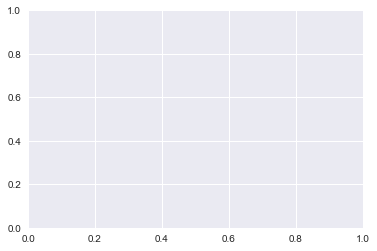

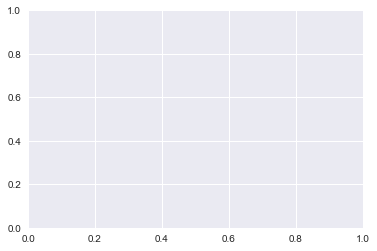

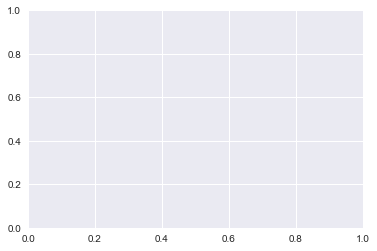

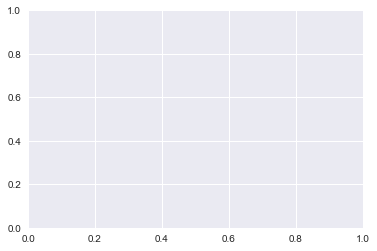

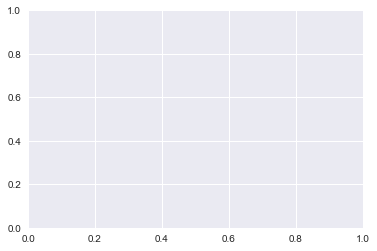

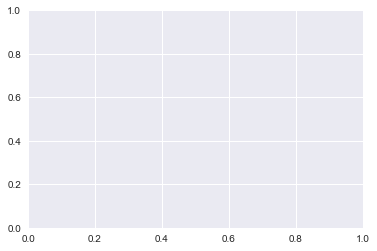

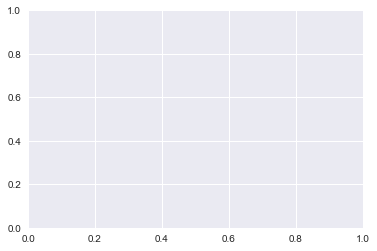

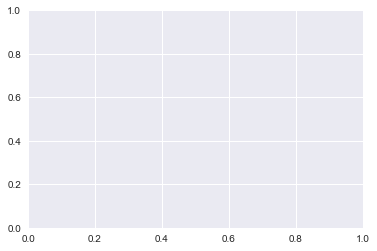

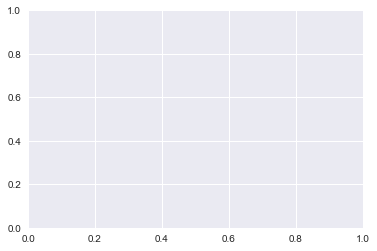

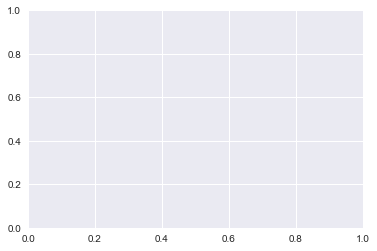

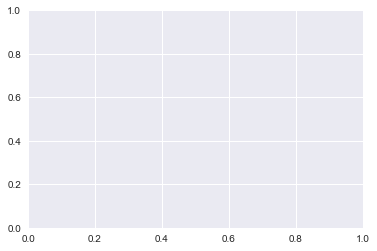

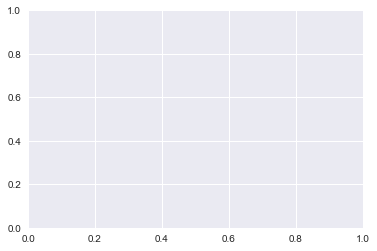

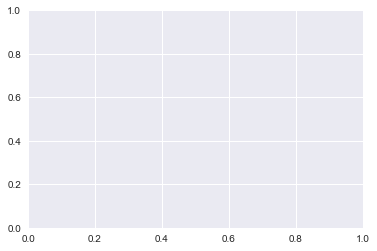

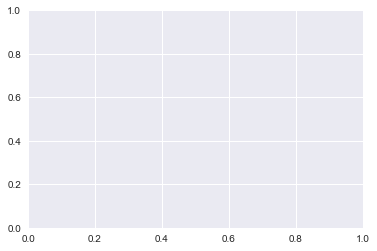

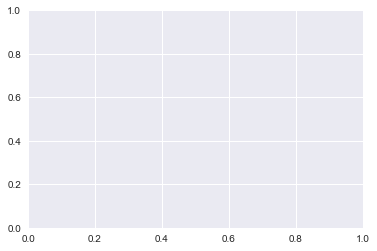

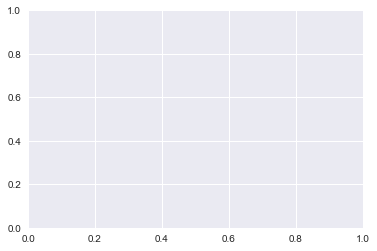

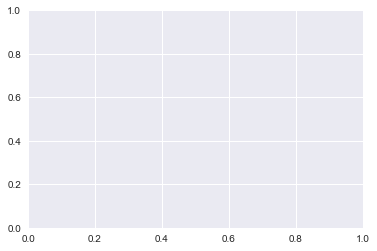

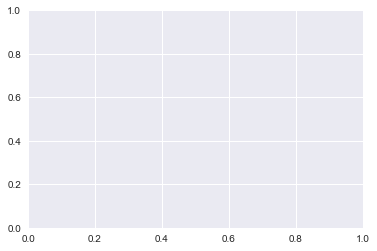

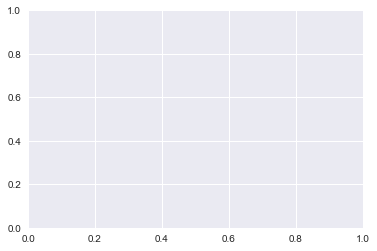

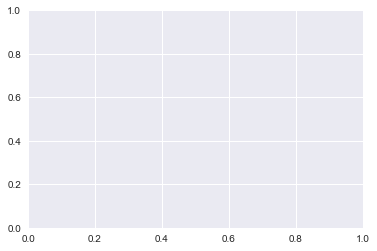

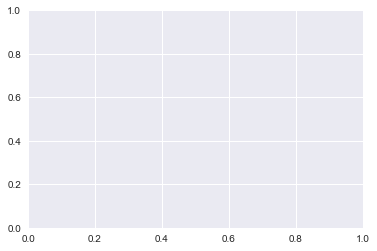

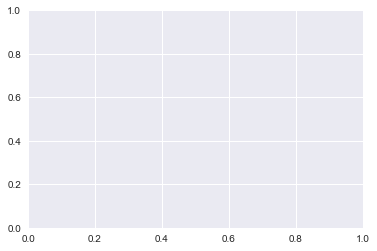

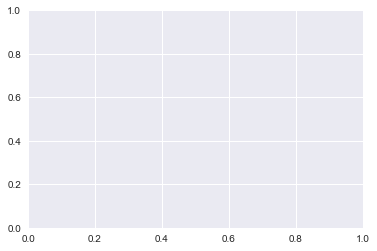

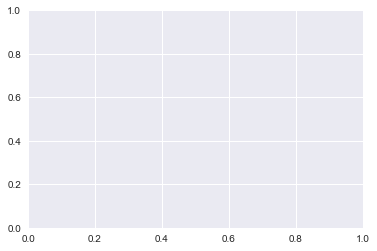

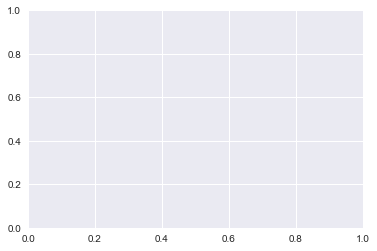

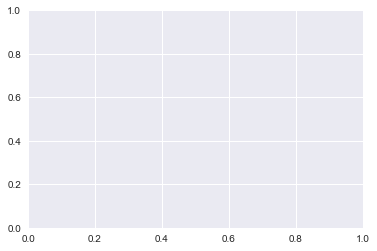

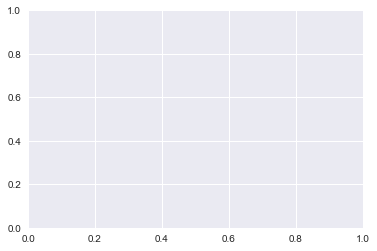

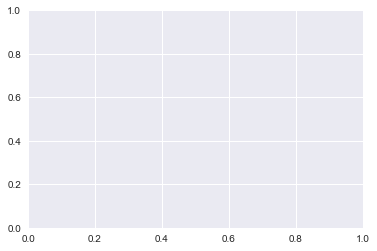

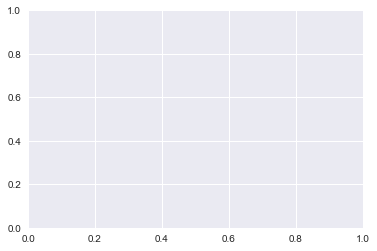

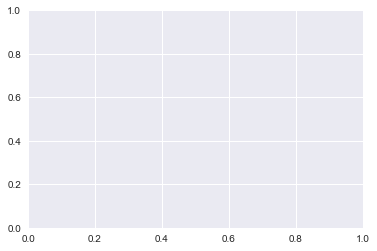

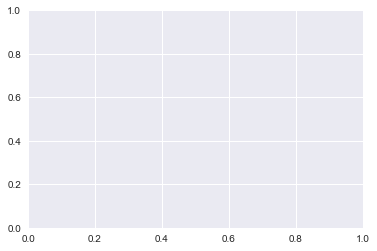

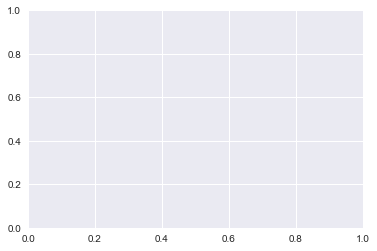

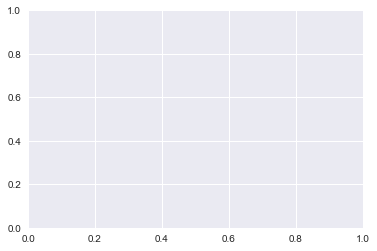

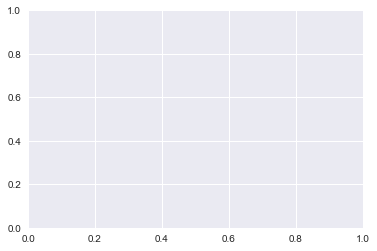

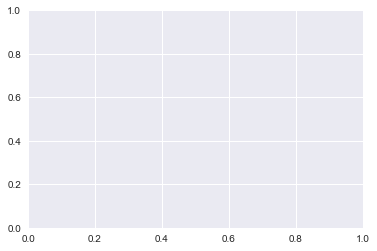

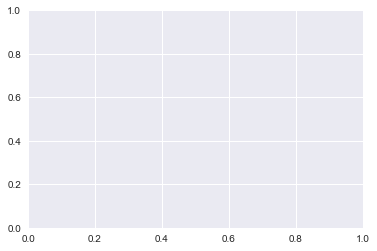

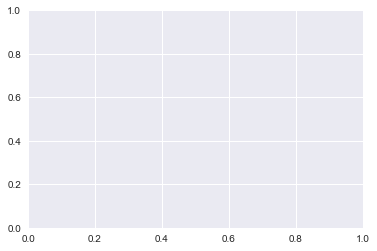

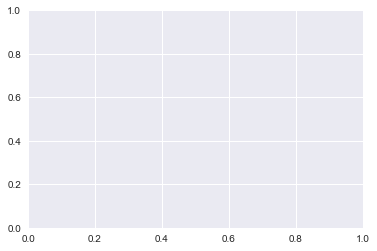

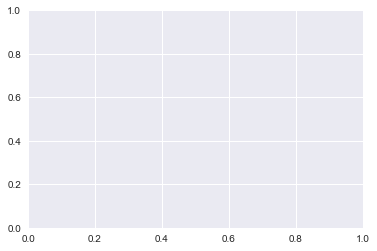

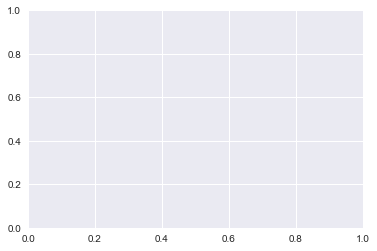

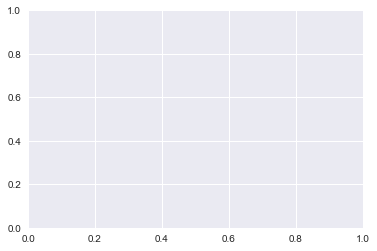

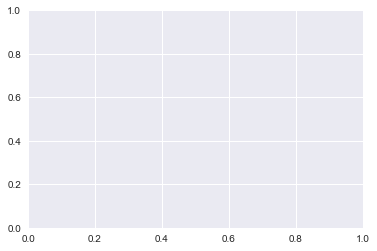

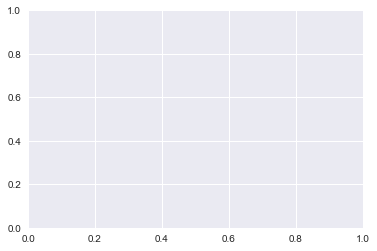

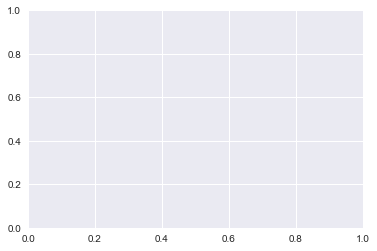

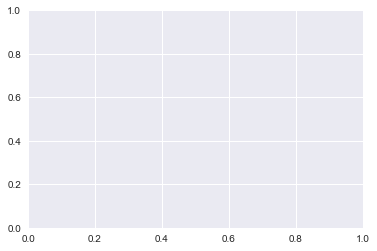

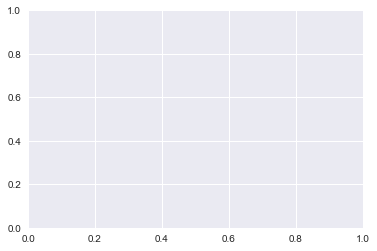

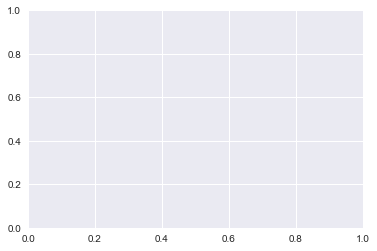

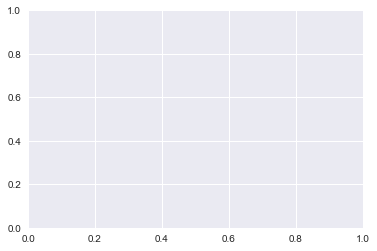

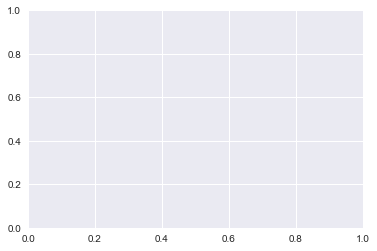

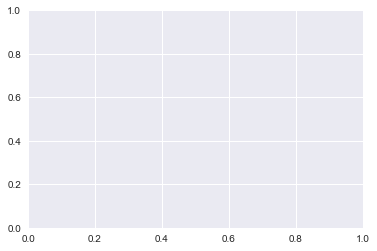

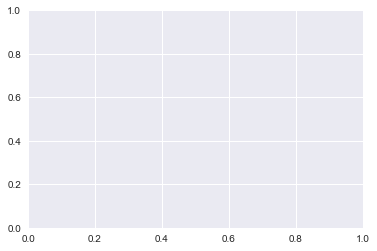

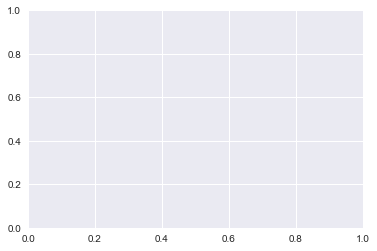

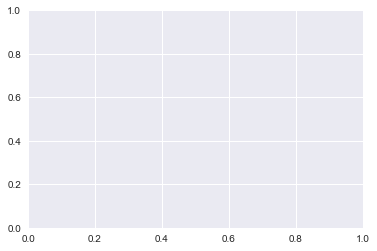

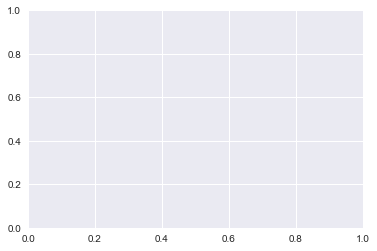

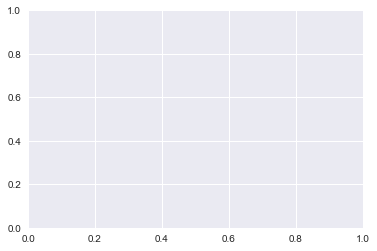

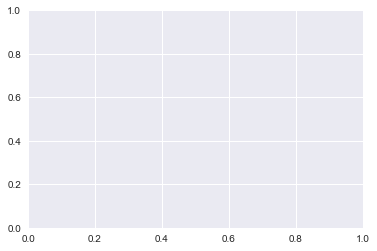

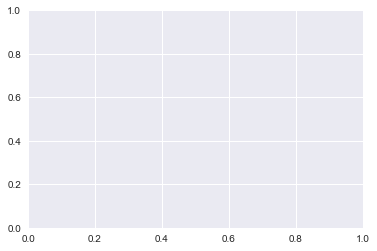

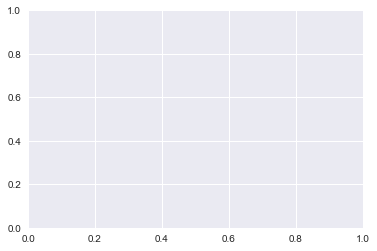

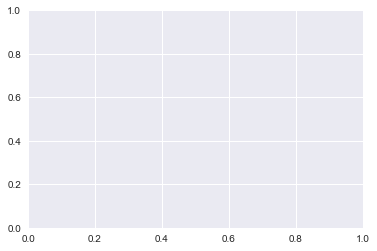

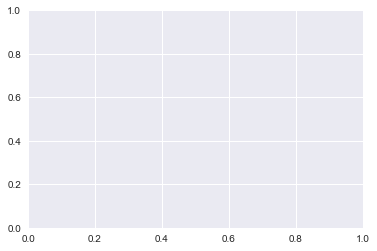

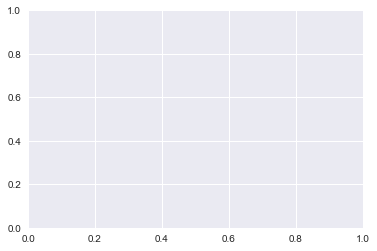

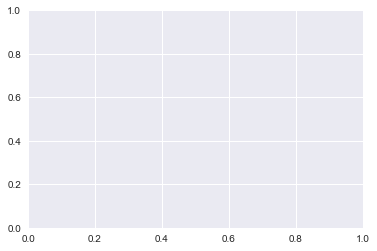

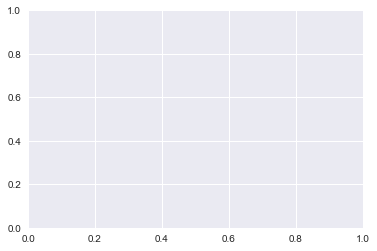

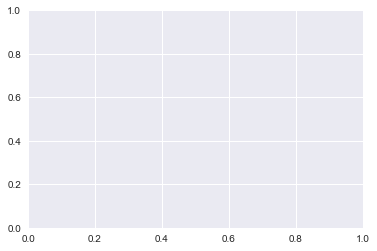

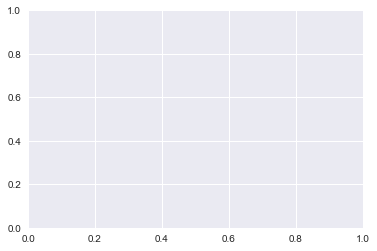

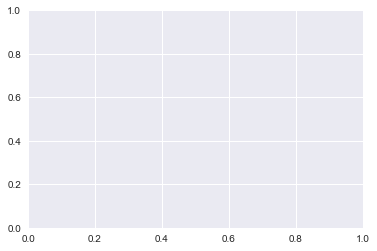

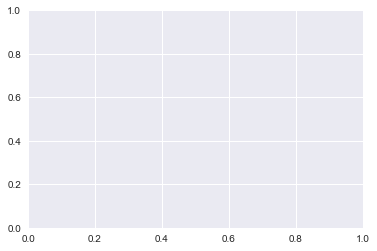

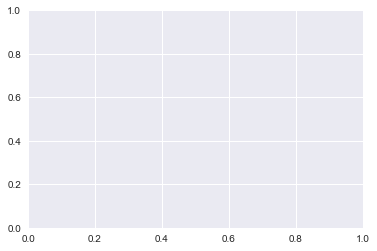

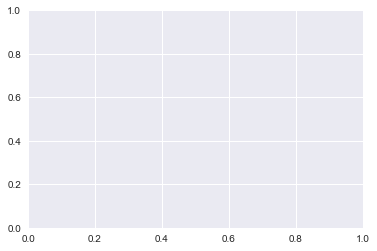

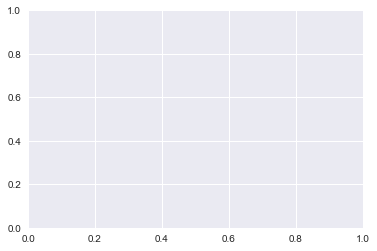

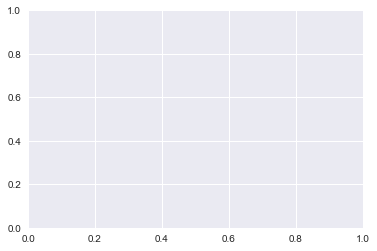

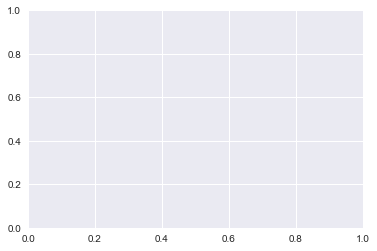

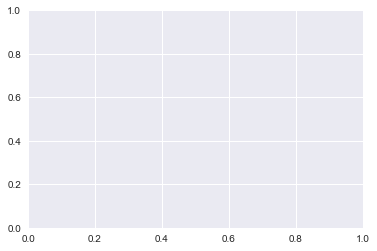

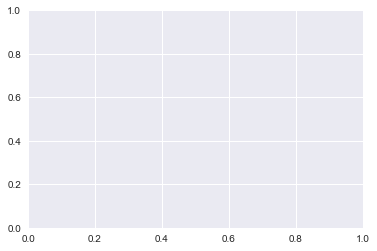

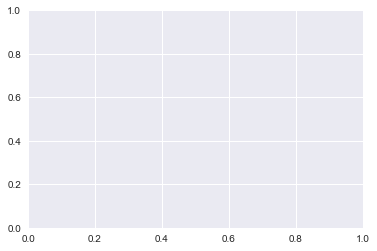

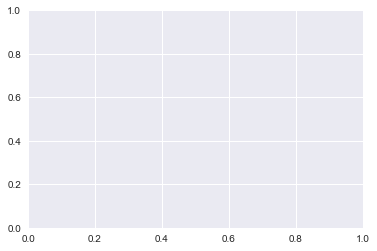

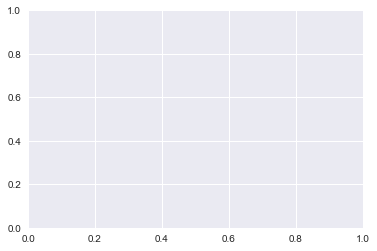

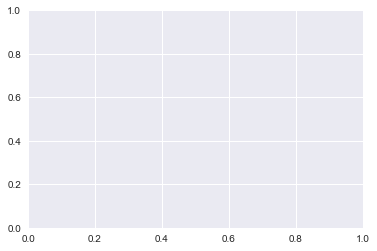

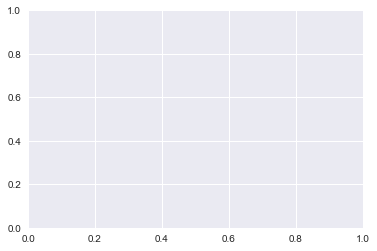

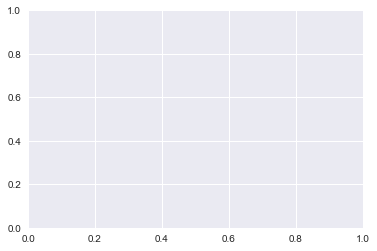

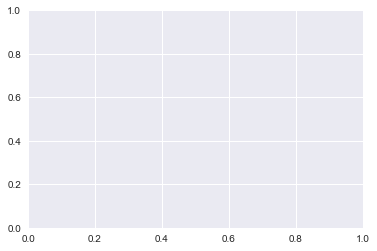

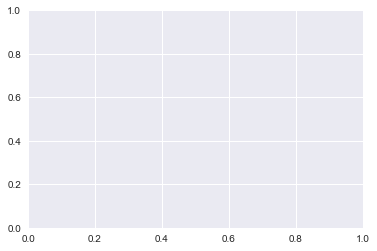

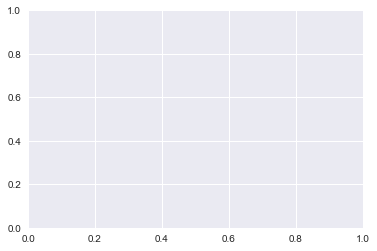

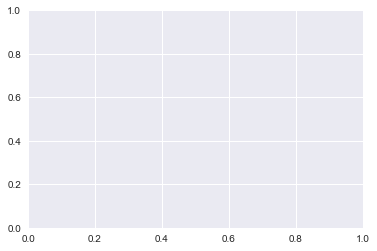

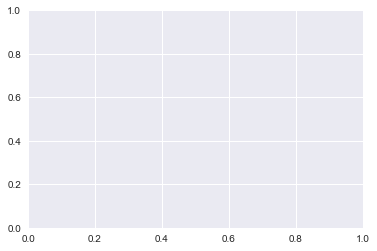

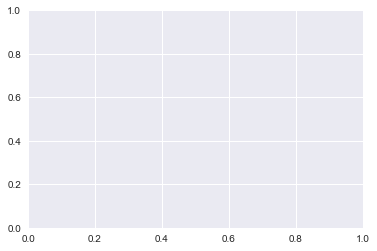

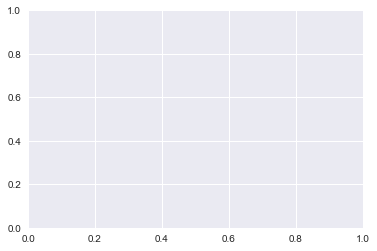

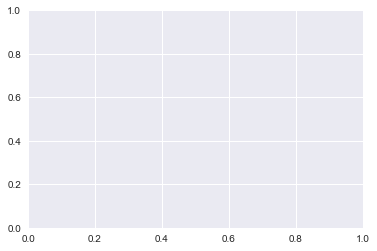

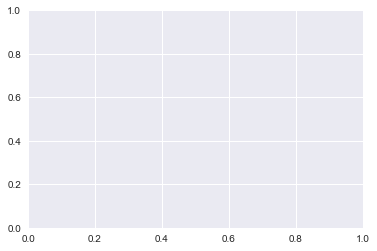

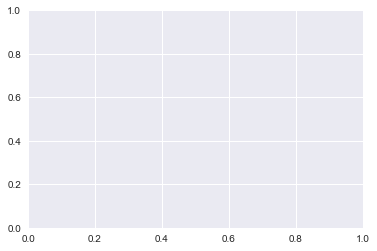

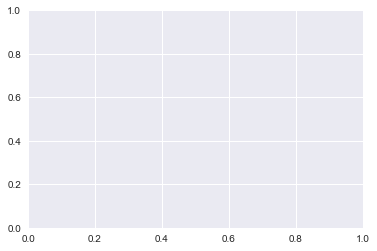

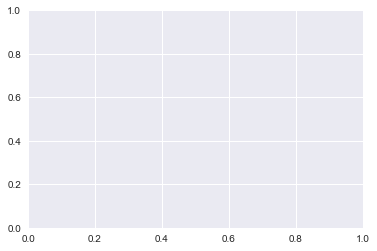

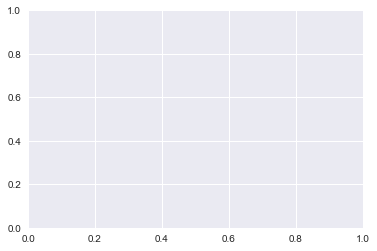

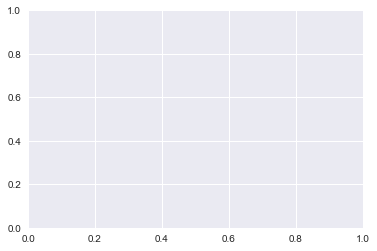

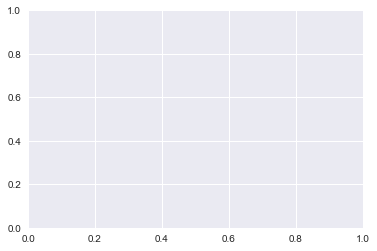

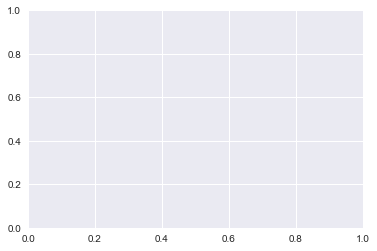

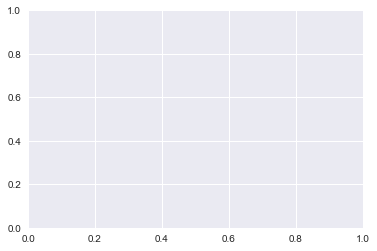

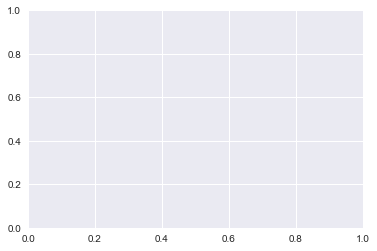

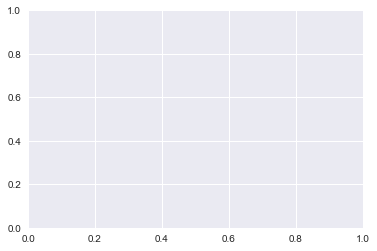

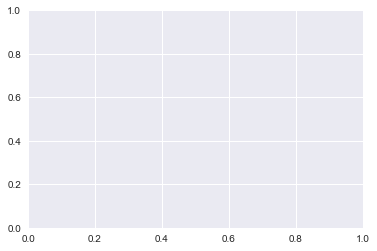

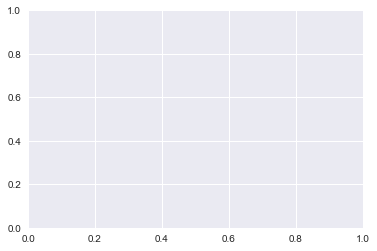

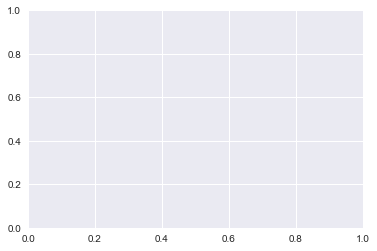

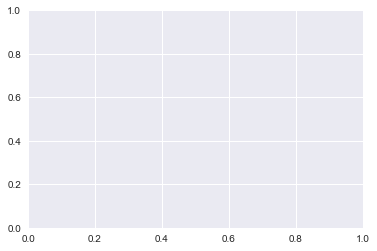

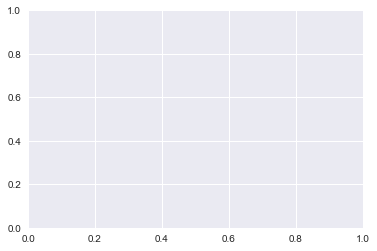

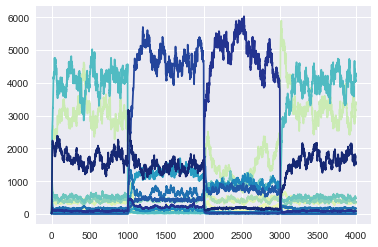

In [284]:
#animation, num_fps = animate_histogram(pop,10)
fname = '1000gencycle49.gif'
animation.write_gif( fname , fps = 100)

In [164]:
import pickle
pickle.dump(pop, open( "pop.p", "wb" ) )

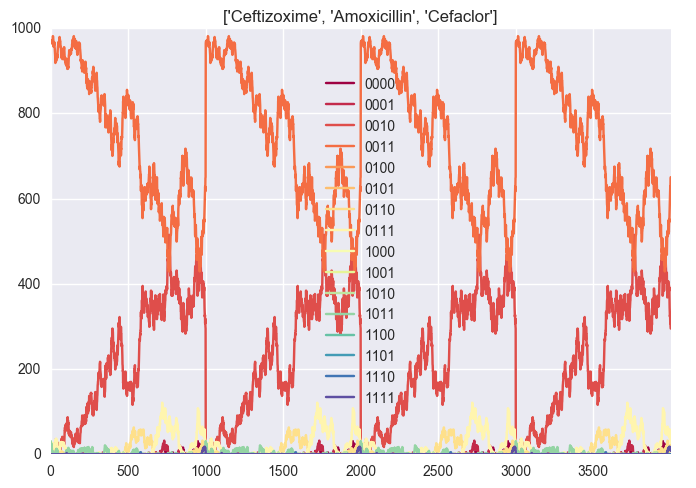

In [920]:

pop=np.concatenate((results1[3], results2[3],results3[3],results4[3]))
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral') 
# Dataset
df = pd.DataFrame(pop,columns=[bin(int(mm))[2:].zfill(4) for mm in np.linspace(0,15,16)] )
 
# plot
df.plot(cmap = cmap)
plt.title([landscapes[x].name for x in threedrugcycles[49][0][0:3]]) 

plt.show()

In [783]:
len(pop)

200

pop[1000]

In [234]:
Ms = [500,1000,5000,10000,50000,100000]

In [237]:
mus = [.00001,.00005,.0001,.0005,.001,.005,.01,.05,.1]
pop_survey=[]

In [264]:
pop_survey=np.zeros((len(Ms),len(mus),30000,16))
for i in range(len(Ms)):
    for j in range(len(mus)):
        pop = ABMcycles(threedrugcycles[49][0][0:3],Ms[i],mus[j])
        pop_survey[i,j]= pop

In [112]:
landscapes[1].landscape[7]

0.063

In [239]:
convertGenotypeToInt([0,0,1,0])

2

In [402]:
f, axarr = plt.subplots(len(mus),len(Ms))
for j in range(len(mus)):
    for i in range(len(Ms)):
        pop = pop_survey[i,j]
        for mm in range(len(np.array(AMP.landscape))):
            axarr[j,i].set_yticklabels([])
            axarr[j,i].set_xticklabels([])
            axarr[j,i].plot(np.arange(len(pop)), pop[:,mm],label=bin(mm)[2:].zfill(4))

            #axarr[j,i].set_yscale("log", nonposy='clip')
            
        


plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.close()

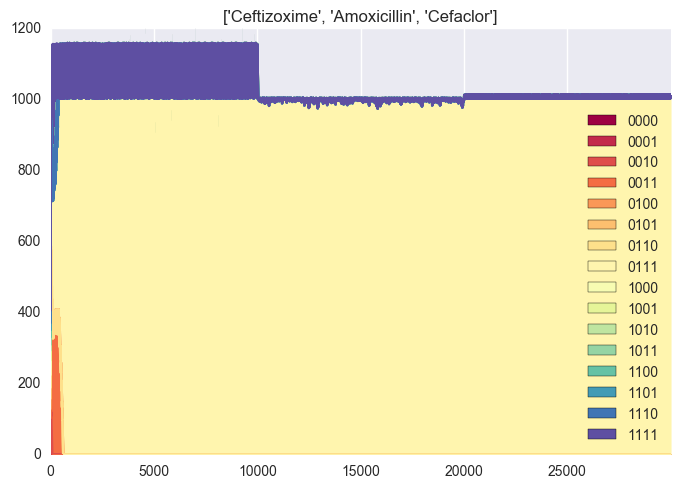

In [433]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral') 
# Dataset
df = pd.DataFrame(pop_survey[1,0],columns=[bin(int(mm))[2:].zfill(4) for mm in np.linspace(0,15,16)] )
 
# plot
df.plot.area(cmap = cmap)
plt.title([landscapes[x].name for x in threedrugcycles[49][0][0:3]]) 
plt.show()


In [422]:
[bin(int(mm))[2:].zfill(4) for mm in np.linspace(0,15,16).tolist()]

['0000',
 '0001',
 '0010',
 '0011',
 '0100',
 '0101',
 '0110',
 '0111',
 '1000',
 '1001',
 '1010',
 '1011',
 '1100',
 '1101',
 '1110',
 '1111']

In [417]:
np.linspace(0,15,16)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.])

In [408]:
x for x in 

'0000'

In [413]:
np.linspace(0,15,16)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.])

In [489]:
hammingDistance([0,0,0,1],[0,0,0,0])

1

In [647]:
np.linspace(0,15,16)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.])

In [249]:
        dead_cells = np.random.rand(n_allele)
        dead_cells = dead_cells/dead_cells.sum()*n_cells*death_rate
        counts[mm] = counts[mm] - np.int_(dead_cells)
        counts[mm, counts[mm] < 0] = 0

NameError: name 'n_allele' is not defined

In [252]:
np.random.rand(16)

array([0.203087  , 0.93638591, 0.18342009, 0.46734379, 0.61415761,
       0.13187244, 0.97934044, 0.46955902, 0.06093366, 0.49565043,
       0.75136096, 0.54925092, 0.06009998, 0.81918123, 0.94229197,
       0.95840612])

In [255]:
dead_cells = np.random.rand(16)
n_cells = 160
death_rate = .5
dead_cells = dead_cells/dead_cells.sum()

In [256]:
dead_cells

array([0.0286374 , 0.0958288 , 0.08982221, 0.02560549, 0.06889393,
       0.0644636 , 0.00012907, 0.08435525, 0.06112308, 0.08083487,
       0.08247952, 0.09003785, 0.05792207, 0.03353624, 0.07973302,
       0.05659761])

In [258]:
dead_cells*death_rate*n_cells

array([2.2909923 , 7.66630363, 7.18577718, 2.04843927, 5.51151416,
       5.15708806, 0.0103258 , 6.74841971, 4.8898461 , 6.46678932,
       6.59836194, 7.2030279 , 4.63376548, 2.68289925, 6.37864137,
       4.52780853])

In [955]:
        dividing_cells = np.int_(counts[mm]*fit_land*division_scale)

        mutating_cells = dividing_cells*mut_rate
        mutating_cells = np.int_(mutating_cells)


NameError: name 'division_scale' is not defined